In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as pe
from SharedX import ShareXaxis
from UniversalColor import UniversalColor
from legend_shadow import legend_shadow
from scipy.io import readsav
import spiceypy as spice

import os

UC = UniversalColor()
UC.set_palette()

In [2]:
target = 'Ganymede'

In [3]:
PJ_start = 0
PJ_end = 43
fig_title = target+' PJ'+str(PJ_start+1).zfill(2)+'-PJ'+str(PJ_end)
print(fig_title)

Ganymede PJ01-PJ43


In [4]:
# データサイズを調べる
datasize = 0

for i in np.arange(PJ_start,PJ_end,1,dtype=int):
    i += 1
    if i == 2:
        continue
    if i < 10:
        PJ = 'PJ0'+str(i)
    else:
        PJ = 'PJ'+str(i)
        
    savpath = '/Users/shin/Documents/Research/Juno/UVS/Satellite_Footpaths_Shin/Output_v2_PaperHue2023/'+PJ+'/'+target[0]+'FP_info_v900km_fixed.sav'
    if os.path.isfile(savpath):
        savdata = readsav(savpath)
    else:
        continue

    variable = savdata['fp_info']

    # 'MIDTIME_ET'を用いてスライス位置を決定する
    MIDTIME_ET = np.array(variable['MIDTIME_ET'][0])
    idx = np.where(MIDTIME_ET>0)

    datasize += idx[0].size

print(datasize)

561


In [5]:
# データの読み込み
lon_MAW_arr = np.zeros(datasize)
lon_TEB_arr = np.zeros(datasize)
err_lon_MAW_arr = np.zeros(datasize)
err_lon_TEB_arr = np.zeros(datasize)
lat_MAW_arr = np.zeros(datasize)
lat_TEB_arr = np.zeros(datasize)
err_lat_MAW_arr = np.zeros(datasize)
err_lat_TEB_arr = np.zeros(datasize)
moon_s3long_arr = np.zeros(datasize)
et_arr = np.zeros(datasize)
hemisphere_arr = [None]*datasize
pj_num_arr = np.zeros(datasize)

start = 0
for i in np.arange(PJ_start,PJ_end,1,dtype=int):
    i += 1
    if i == 2:
        continue
    if i < 10:
        PJ = 'PJ0'+str(i)
    else:
        PJ = 'PJ'+str(i)
    
    savpath = '/Users/shin/Documents/Research/Juno/UVS/Satellite_Footpaths_Shin/Output_v2_PaperHue2023/'+PJ+'/'+target[0]+'FP_info_v900km_fixed.sav'
    if os.path.isfile(savpath):
        savdata = readsav(savpath)
    else:
        continue
    
    variable = savdata['fp_info']

    # 'MIDTIME_ET'を用いてスライス位置を決定する
    MIDTIME_ET = np.array(variable['MIDTIME_ET'][0])
    idx = np.where(MIDTIME_ET>0)
    end = start+idx[0].size

    lon_MAW_arr[start:end] = np.array(variable['LON_MAW'][0])[idx]
    lon_TEB_arr[start:end] = np.array(variable['LON_TEB'][0])[idx]
    err_lon_MAW_arr[start:end] = np.array(variable['LON_MAW_ERROR'][0])[idx]
    err_lon_TEB_arr[start:end] = np.array(variable['LON_TEB_ERROR'][0])[idx]
    lat_MAW_arr[start:end] = np.array(variable['LAT_MAW'][0])[idx]
    lat_TEB_arr[start:end] = np.array(variable['LAT_TEB'][0])[idx]
    err_lat_MAW_arr[start:end] = np.array(variable['LAT_MAW_ERROR'][0])[idx]
    err_lat_TEB_arr[start:end] = np.array(variable['LAT_TEB_ERROR'][0])[idx]
    moon_s3long_arr[start:end] = np.array(variable['SIII_LON'][0])[idx]
    et_arr[start:end] = np.array(variable['MIDTIME_ET'][0])[idx]
    hemisphere_arr[start:end] = variable['HEMISPHERE'][0][idx]
    pj_num_arr[start:end] = i

    start = end

# データがない部分はnp.nanで置き換える
nonumber = np.where((lon_MAW_arr<-100)|(lon_TEB_arr<-100))
moon_s3long_arr[nonumber] = np.nan
lon_MAW_arr[nonumber] = np.nan 
err_lon_MAW_arr[nonumber] = np.nan
lat_MAW_arr[nonumber] = np.nan 
err_lat_MAW_arr[nonumber] = np.nan
lon_TEB_arr[nonumber] = np.nan 
err_lon_TEB_arr[nonumber] = np.nan
lat_TEB_arr[nonumber] = np.nan 
err_lat_TEB_arr[nonumber] = np.nan
pj_num_arr[nonumber] = np.nan

for i in nonumber[0]:
    hemisphere_arr[i] = b'NaN'

In [6]:
print(hemisphere_arr)

[b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'South', b'South', b'South', b'South', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'South', b'South', b'NaN', b'South', b'South', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'NaN', b'South', b'South', b'South', b'South', b'South', b'Sou

In [7]:
print(nonumber)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  49,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 170, 171, 176,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
       190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,
       203, 204, 205, 206, 207, 208, 209, 215, 221, 224, 227, 2

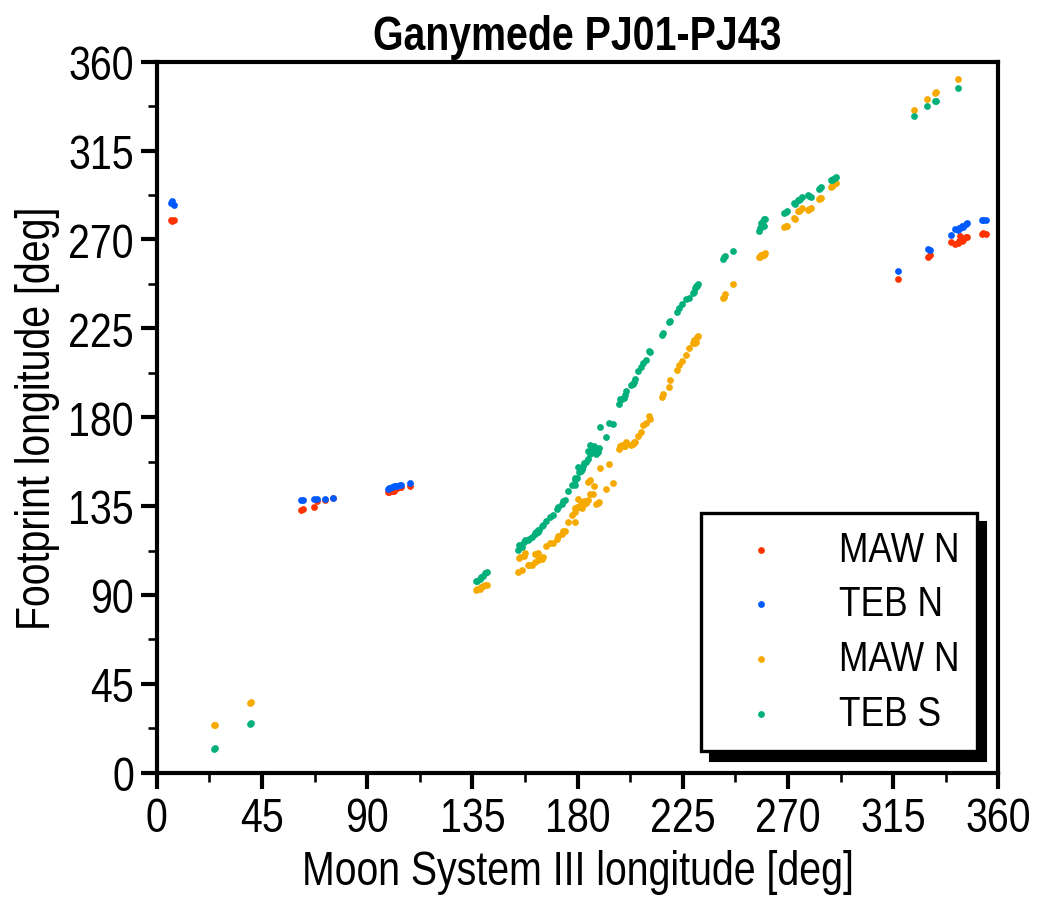

In [8]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(7,6), ticksize=1.5,
                dpi='M')
F.initialize()

F.set_xaxis(label='Moon System III longitude [deg]',
            min=0, max=360,
            ticks=np.arange(0,360+1,45),
            ticklabels=np.arange(0,360+1,45))
F.set_yaxis(ax_idx=0, label='Footprint longitude [deg]',
            min=0, max=360,
            ticks=np.arange(0,360+1,45),
            ticklabels=np.arange(0,360+1,45))

north = np.where(np.array(hemisphere_arr)==b'North')
F.ax.scatter(moon_s3long_arr[north], lon_MAW_arr[north], color=UC.red, s=5, label='MAW N')
F.ax.scatter(moon_s3long_arr[north], lon_TEB_arr[north], color=UC.blue, s=5, label='TEB N')

south = np.where(np.array(hemisphere_arr)==b'South')
F.ax.scatter(moon_s3long_arr[south], lon_MAW_arr[south], color=UC.orange, s=5, label='MAW N')
F.ax.scatter(moon_s3long_arr[south], lon_TEB_arr[south], color=UC.green, s=5, label='TEB S')

F.ax.set_title(fig_title, fontsize=F.fontsize, weight='bold')

legend = F.legend(ax_idx=0, loc='lower right')
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

In [9]:
spice.furnsh('/Users/shin/Documents/Research/Jupiter/Codes/HST/kernel/cassMetaK.txt')
et_hst = spice.str2et('2014-01-16T00:00:00')
print(et_hst)

443102467.18435526


In [10]:
def moonS3wlon(et:float, MOON:str):
    # Juno's position seen from Jupiter in IAU_JUPITER coordinate.
    _, lightTimes = spice.spkpos(
        targ='JUNO', et=et, ref='IAU_JUPITER', abcorr='LT+S', obs='JUPITER'
    )

    # Moon's position seen from Jupiter in IAU_JUPITER coordinate.
    pos, _ = spice.spkpos(
        targ=MOON, et=et, ref='IAU_JUPITER', abcorr='none', obs='JUPITER'
    )

    posx, posy, posz = pos[0], pos[1], pos[2]
    posr = np.sqrt(posx**2 + posy**2 + posz**2)
    # postheta = np.arccos(posz/posr)
    posphi = np.arctan2(posy, posx)
    if posphi < 0:
        Sys3 = np.degrees(-posphi)
    else:
        Sys3 = np.degrees(2*np.pi - posphi)

    return Sys3

In [11]:
savpath = "/Users/shin/Documents/Research/Juno/UVS/Codes/data/Satellite_FP_JRM33.sav"
data = readsav(savpath)
print(type(data))
print(data.keys())
variable = data['gfp_contour_n']

print(variable[1500:1510])
# >>> Satellite S3 w-longitude, Footprint S3 w-longitude, Footprint latitude

# print(variable[1500:1600][:,0])

<class 'scipy.io._idl.AttrDict'>
dict_keys(['ifp_contour_n', 'ifp_contour_s', 'efp_contour_n', 'efp_contour_s', 'gfp_contour_n', 'gfp_contour_s', 'cfp_contour_s_kk', 'cfp_contour_s_con2020', 'cfp_contour_n_kk', 'cfp_contour_n_con2020'])
[[ 75.       140.13      63.929996]
 [ 75.05     140.14188   63.915646]
 [ 75.1      140.15373   63.90129 ]
 [ 75.15     140.16557   63.886936]
 [ 75.200005 140.17741   63.872578]
 [ 75.25     140.18924   63.858223]
 [ 75.3      140.20105   63.843864]
 [ 75.35     140.21284   63.829506]
 [ 75.4      140.22462   63.815147]
 [ 75.450005 140.2364    63.800785]]


In [12]:
def S3EQ(fpwlon, fplat, hemisphere, MOON: str):
    """_summary_

    Args:
        fpwlon: System III longitude of footprint aurora at Jupiter's upper atmosphere [deg]
        satmodel: footprint model from magnetic field model
        MOON: select from IO, EUROPA, GANYMEDE

    Returns:
        y: System III longitude of instantaneous field line at the orbital plane
    """

    if hemisphere == b'North':
        satmodel = np.recfromtxt('data/JRM33/satellite_foot_N.txt', skip_header=3,
                names=['wlon', 'amlat', 'amwlon', 'iolat', 'iowlon', 'eulat', 'euwlon', 'galat', 'gawlon'])
    elif hemisphere == b'South':
        satmodel = np.recfromtxt('data/JRM33/satellite_foot_S.txt', skip_header=3,
                names=['wlon', 'amlat', 'amwlon', 'iolat', 'iowlon', 'eulat', 'euwlon', 'galat', 'gawlon'])
    else:
        # print('Hemisphere not found')
        return np.nan

    # eqwlon = satmodel.wlon[:-1]     # Satellite System III longitude at the equator

    savpath = "/Users/shin/Documents/Research/Juno/UVS/Codes/data/Satellite_FP_JRM33.sav"
    data = readsav(savpath)

    if (MOON == 'IO') or (MOON == 'Io'):
        s3wlon = satmodel.iowlon[:-1]
        s3lat = satmodel.galat[:-1]
        data_name = 'ifp_contour'

    elif (MOON == 'EUROPA') or (MOON == 'Europa'):
        s3wlon = satmodel.euwlon[:-1]
        s3lat = satmodel.galat[:-1]
        data_name = 'efp_contour'

    elif (MOON == 'GANYMEDE') or (MOON == 'Ganymede'):
        s3wlon = satmodel.gawlon[:-1]
        s3lat = satmodel.galat[:-1]
        data_name = 'gfp_contour'

    if hemisphere == b'North':
        variable = data[data_name+'_n']
        eqwlon = variable[0:-1][:,0]
        s3wlon = variable[0:-1][:,1]
        s3lat = variable[0:-1][:,2]

    elif hemisphere == b'South':
        variable = data[data_name+'_s']
        eqwlon = variable[0:-1][:,0]
        s3wlon = variable[0:-1][:,1]
        s3lat = variable[0:-1][:,2]

        """
        if hemisphere == b'North':
            if fplat > 80:
                slice_idx = np.where(s3lat>80)
                s3wlon = s3wlon[slice_idx]
                eqwlon = eqwlon[slice_idx]
            elif (fplat <= 80) and (fplat > 60):
                slice_idx = np.where((s3lat<=80)&(s3lat>60))
                s3wlon = s3wlon[slice_idx]
                eqwlon = eqwlon[slice_idx]
            else:
                slice_idx = np.where(s3lat<=60)
                s3wlon = s3wlon[slice_idx]
                eqwlon = eqwlon[slice_idx]
        """

    # Search the System III index
    distance = (s3wlon[:-1]-fpwlon)**2 + (s3lat[:-1]-fplat)**2
    
    argsorted = np.argsort(distance, axis=0)
    # s3_idx0, s3_idx1 = argsorted[0], argsorted[1]

    s3_idx0 = argsorted[0]
    s3wlon0 = s3wlon[s3_idx0]
    eqwlon0 = eqwlon[s3_idx0]

    """
    if s3_idx0 == 0:
        if abs(s3wlon[1]-fpwlon) > abs(s3wlon[-2]-fpwlon):
            s3_idx1 = -2
        else:
            s3_idx1 = 1
    elif s3_idx0 == s3wlon.size-1:
        if abs(s3wlon[0]-fpwlon) > abs(s3wlon[s3_idx0-1]-fpwlon):
            s3_idx1 = s3_idx0-1
        else:
            s3_idx1 = 0
    else:
        if abs(s3wlon[s3_idx0+1]-fpwlon) > abs(s3wlon[s3_idx0-1]-fpwlon):
            s3_idx1 = s3_idx0-1
        else:
            s3_idx1 = s3_idx0+1
    """

    s3_idx1 = argsorted[1]
    s3wlon1 = s3wlon[s3_idx1]
    eqwlon1 = eqwlon[s3_idx1]

    x = fpwlon
    x0 = s3wlon0
    x1 = s3wlon1
    y0 = eqwlon0
    y1 = eqwlon1

    # print(x0, x1, y0, y1)

    if y0-y1 > 180:
        y1 += 360
    elif y1-y0 > 180:
        y0 += 360

    y = ((y1-y0)/(x1-x0))*(x-x0) + y0

    if y > 360:
        y += -360
    elif y < 0:
        y += 360

    return eqwlon0

In [13]:
# JRM33
satovalN = np.recfromtxt('data/JRM33/satellite_foot_N.txt', skip_header=3,
                names=['wlon', 'amlat', 'amwlon', 'iolat', 'iowlon', 'eulat', 'euwlon', 'galat', 'gawlon'])

satovalS = np.recfromtxt('data/JRM33/satellite_foot_S.txt', skip_header=3,
                names=['wlon', 'amlat', 'amwlon', 'iolat', 'iowlon', 'eulat', 'euwlon', 'galat', 'gawlon'])

In [14]:
spice.et2utc(et_arr[0], format_str='C', prec=2)
spice.et2utc(et_arr[-1], format_str='C', prec=2)

'2022 MAY 23 01:44:30.28'

In [15]:
print(hemisphere_arr[0])

b'NaN'


In [16]:
MAW_eq_arr = np.zeros(datasize)
MAW_eq_arr_0 = np.zeros(datasize)
MAW_eq_arr_1 = np.zeros(datasize)
d_MAW_eq_arr = np.zeros(datasize)
d_MAW_eq_arr_0 = np.zeros(datasize)
d_MAW_eq_arr_1 = np.zeros(datasize)
TEB_eq_arr = np.zeros(datasize)
TEB_eq_arr_0 = np.zeros(datasize)
TEB_eq_arr_1 = np.zeros(datasize)
d_TEB_eq_arr = np.zeros(datasize)
d_TEB_eq_arr_0 = np.zeros(datasize)
d_TEB_eq_arr_1 = np.zeros(datasize)
moon_eq_spice = np.zeros(datasize)

for i in range(datasize):
    moon_eq_spice[i] = moonS3wlon(et=et_arr[i], MOON=target)
    MAW_eq_arr[i] = S3EQ(lon_MAW_arr[i], lat_MAW_arr[i], hemisphere_arr[i], MOON=target)
    MAW_eq_arr_0[i] = S3EQ(lon_MAW_arr[i]+err_lon_MAW_arr[i], lat_MAW_arr[i], hemisphere_arr[i], MOON=target)
    MAW_eq_arr_1[i] = S3EQ(lon_MAW_arr[i]-err_lon_MAW_arr[i], lat_MAW_arr[i], hemisphere_arr[i], MOON=target)
    d_MAW_eq_arr[i] = moon_eq_spice[i]-MAW_eq_arr[i]
    d_MAW_eq_arr_0[i] = MAW_eq_arr_0[i]-MAW_eq_arr[i]
    d_MAW_eq_arr_1[i] = MAW_eq_arr[i]-MAW_eq_arr_1[i]

    TEB_eq_arr[i] = S3EQ(lon_TEB_arr[i], lat_TEB_arr[i], hemisphere_arr[i], MOON=target)
    TEB_eq_arr_0[i] = S3EQ(lon_TEB_arr[i]+err_lon_TEB_arr[i], lat_TEB_arr[i], hemisphere_arr[i], MOON=target)
    TEB_eq_arr_1[i] = S3EQ(lon_TEB_arr[i]-err_lon_TEB_arr[i], lat_TEB_arr[i], hemisphere_arr[i], MOON=target)
    d_TEB_eq_arr[i] = moon_eq_spice[i]-TEB_eq_arr[i]
    d_TEB_eq_arr_0[i] = TEB_eq_arr_0[i]-TEB_eq_arr[i]
    d_TEB_eq_arr_1[i] = TEB_eq_arr[i]-TEB_eq_arr_1[i]

    # print(i)
    if d_MAW_eq_arr[i] < 0:
        d_MAW_eq_arr[i] += 360.
    if d_TEB_eq_arr[i] < 0:
        d_TEB_eq_arr[i] += 360.
    if d_MAW_eq_arr_0[i] < 0:
        print(i)
        # d_MAW_eq_arr_0[i] = np.nan
    if d_MAW_eq_arr_1[i] < 0:
        print('   ', i)
        # d_MAW_eq_arr_0[i] = np.nan
    if d_MAW_eq_arr_1[i] > 5:
        print(i)

# データがない部分はnp.nanで置き換える
MAW_eq_arr[nonumber] = np.nan
MAW_eq_arr_0[nonumber] = np.nan
MAW_eq_arr_1[nonumber] = np.nan
d_MAW_eq_arr[nonumber] = np.nan
d_MAW_eq_arr_0[nonumber] = np.nan
d_MAW_eq_arr_1[nonumber] = np.nan
TEB_eq_arr[nonumber] = np.nan
TEB_eq_arr_0[nonumber] = np.nan
TEB_eq_arr_1[nonumber] = np.nan
d_TEB_eq_arr[nonumber] = np.nan
d_TEB_eq_arr_0[nonumber] = np.nan
d_TEB_eq_arr_1[nonumber] = np.nan
moon_eq_spice[nonumber] = np.nan

In [17]:
jdx = 2
print(hemisphere_arr[jdx])
print(lon_MAW_arr[jdx], lat_MAW_arr[jdx], err_lat_MAW_arr[jdx])
print(MAW_eq_arr[jdx], MAW_eq_arr_0[jdx], MAW_eq_arr_1[jdx])
print(d_MAW_eq_arr_0[jdx])

MAW_eq_arr_0[jdx] = S3EQ(lon_MAW_arr[jdx]+err_lon_MAW_arr[jdx], lat_MAW_arr[jdx], hemisphere_arr[jdx], MOON=target)
MAW_eq_arr_1[jdx] = S3EQ(lon_MAW_arr[jdx]-err_lon_MAW_arr[jdx], lat_MAW_arr[jdx], hemisphere_arr[jdx], MOON=target)

b'NaN'
nan nan nan
nan nan nan
nan


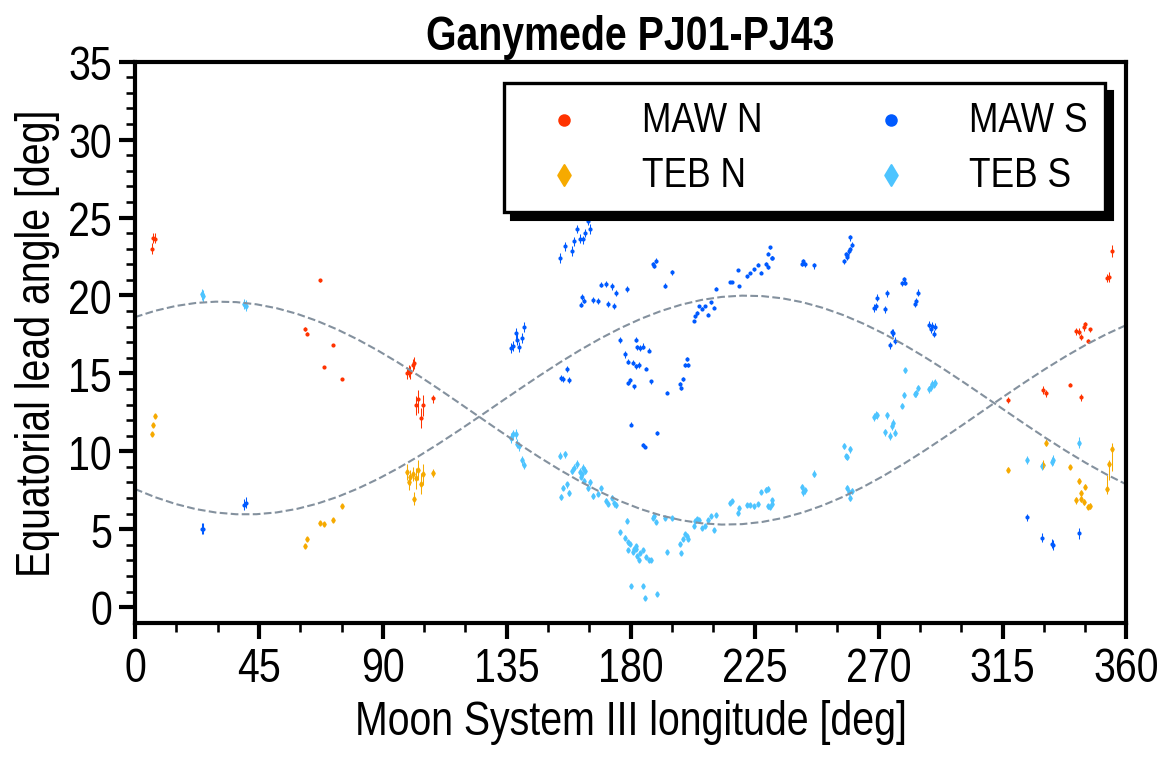

In [18]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(8,5), ticksize=1.5,
                dpi='M')
F.initialize()

ymax = 1
if target == 'Io':
    ymax = 12
elif target == 'Europa':
    ymax = 18
elif target == 'Ganymede':
    ymax = 35

F.set_xaxis(label='Moon System III longitude [deg]',
            min=0, max=360,
            ticks=np.arange(0,360+1,45),
            ticklabels=np.arange(0,360+1,45),
            minor_num=3)
F.set_yaxis(ax_idx=0, label='Equatorial lead angle [deg]',
            min=-1, max=ymax,
            ticks=np.arange(0,ymax+1,5),
            ticklabels=np.arange(0,ymax+1,5),
            minor_num=5)

north = np.where(np.array(hemisphere_arr)==b'North')
F.ax.scatter(moon_s3long_arr[north], d_MAW_eq_arr[north], 
             color=UC.red, s=1, label='MAW N')
F.ax.errorbar(moon_s3long_arr[north], d_MAW_eq_arr[north], 
              yerr=np.array([d_MAW_eq_arr_0[north], 
                             d_MAW_eq_arr_1[north]]),
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.red)
F.ax.scatter(moon_s3long_arr[north], d_TEB_eq_arr[north], 
             color=UC.orange, s=2, marker='d', label='TEB N')
F.ax.errorbar(moon_s3long_arr[north], d_TEB_eq_arr[north], 
              yerr=np.array([d_TEB_eq_arr_0[north], 
                             d_TEB_eq_arr_1[north]]),
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.orange)

south = np.where(np.array(hemisphere_arr)==b'South')
F.ax.scatter(moon_s3long_arr[south], d_MAW_eq_arr[south], color=UC.blue, s=1, label='MAW S')
F.ax.errorbar(moon_s3long_arr[south], d_MAW_eq_arr[south], 
              yerr=np.array([d_MAW_eq_arr_0[south], 
                             d_MAW_eq_arr_1[south]]),
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.blue)
F.ax.scatter(moon_s3long_arr[south], d_TEB_eq_arr[south], 
             color=UC.lightblue, s=2, marker='d', label='TEB S')
F.ax.errorbar(moon_s3long_arr[south], d_TEB_eq_arr[south], 
              yerr=np.array([d_TEB_eq_arr_0[south], 
                             d_TEB_eq_arr_1[south]]),
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.lightblue)

F.ax.set_title(fig_title, fontsize=F.fontsize, weight='bold')

x = np.linspace(0, 2*3.141592, 50)
if target=='Io':
    y_N = 4.26+2.64*np.cos(x)+0.50*np.sin(x)+0.20*np.cos(2*x)+0.126*np.sin(2*x)
    y_S = 4.14-1.89*np.cos(x)-0.70*np.sin(x)+0.22*np.cos(2*x)-0.12*np.sin(2*x)
if target=='Europa':
    y_N = 5.78+3.29*np.cos(0.99*x)+1.41*np.sin(0.99*x)
    y_S = 7.06-3.37*np.cos(x)+0.15*np.sin(x)
if target=='Ganymede':
    y_N = 12.45+6.16*np.cos(0.98*x)+3.64*np.sin(0.98*x)
    y_S = 12.97-5.39*np.cos(0.99*x)-4.50*np.sin(0.99*x)

F.ax.plot(np.degrees(x), y_N, linestyle='--', linewidth=1, color=UC.gray)
F.ax.plot(np.degrees(x), y_S, linestyle='--', linewidth=1, color=UC.gray)

legend = F.legend(ax_idx=0, loc='upper right', ncol=2, markerscale=5)
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

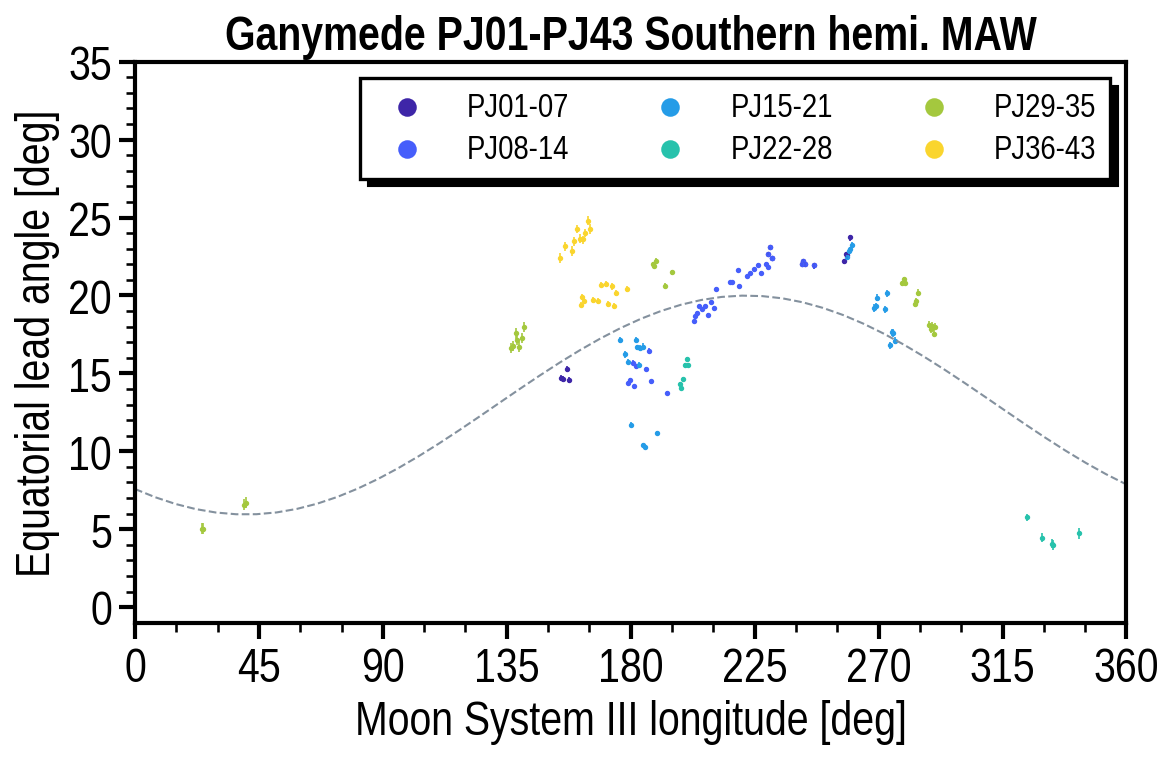

In [19]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(8,5), ticksize=1.5,
                dpi='M')
F.initialize()

ymax = 1
if target == 'Io':
    ymax = 12
elif target == 'Europa':
    ymax = 18
elif target == 'Ganymede':
    ymax = 35

F.set_xaxis(label='Moon System III longitude [deg]',
            min=0, max=360,
            ticks=np.arange(0,360+1,45),
            ticklabels=np.arange(0,360+1,45),
            minor_num=3)
F.set_yaxis(ax_idx=0, label='Equatorial lead angle [deg]',
            min=-1, max=ymax,
            ticks=np.arange(0,ymax+1,5),
            ticklabels=np.arange(0,ymax+1,5),
            minor_num=5)

PJ01_07_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr<=8))
pos = PJ01_07_south
sccolor = F._parula_colors()[0]
F.ax.scatter(moon_s3long_arr[pos], d_MAW_eq_arr[pos], 
             color=sccolor, s=2.5, label='PJ01-07')
F.ax.errorbar(moon_s3long_arr[pos], d_MAW_eq_arr[pos], 
              yerr=np.array([d_MAW_eq_arr_0[pos], 
                             d_MAW_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ08_14_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=8)&(pj_num_arr<=15))
pos = PJ08_14_south
sccolor = F._parula_colors()[45]
F.ax.scatter(moon_s3long_arr[pos], d_MAW_eq_arr[pos], 
             color=sccolor, s=2.5, label='PJ08-14')
F.ax.errorbar(moon_s3long_arr[pos], d_MAW_eq_arr[pos], 
              yerr=np.array([d_MAW_eq_arr_0[pos], 
                             d_MAW_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ15_21_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=15)&(pj_num_arr<=21))
pos = PJ15_21_south
sccolor = F._parula_colors()[90]
F.ax.scatter(moon_s3long_arr[pos], d_MAW_eq_arr[pos], 
             color=sccolor, s=2.5, label='PJ15-21')
F.ax.errorbar(moon_s3long_arr[pos], d_MAW_eq_arr[pos], 
              yerr=np.array([d_MAW_eq_arr_0[pos], 
                             d_MAW_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ22_28_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=22)&(pj_num_arr<=28))
pos = PJ22_28_south
sccolor = F._parula_colors()[135]
F.ax.scatter(moon_s3long_arr[pos], d_MAW_eq_arr[pos], 
             color=sccolor, s=2.5, label='PJ22-28')
F.ax.errorbar(moon_s3long_arr[pos], d_MAW_eq_arr[pos], 
              yerr=np.array([d_MAW_eq_arr_0[pos], 
                             d_MAW_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ29_35_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=29)&(pj_num_arr<=35))
pos = PJ29_35_south
sccolor = F._parula_colors()[180]
F.ax.scatter(moon_s3long_arr[pos], d_MAW_eq_arr[pos], 
             color=sccolor, s=2.5, label='PJ29-35')
F.ax.errorbar(moon_s3long_arr[pos], d_MAW_eq_arr[pos], 
              yerr=np.array([d_MAW_eq_arr_0[pos], 
                             d_MAW_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ36_43_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=36)&(pj_num_arr<=43))
pos = PJ36_43_south
sccolor = F._parula_colors()[230]
F.ax.scatter(moon_s3long_arr[pos], d_MAW_eq_arr[pos], 
             color=sccolor, s=2.5, label='PJ36-43')
F.ax.errorbar(moon_s3long_arr[pos], d_MAW_eq_arr[pos], 
              yerr=np.array([d_MAW_eq_arr_0[pos], 
                             d_MAW_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

F.ax.set_title(fig_title+' Southern hemi. MAW', fontsize=F.fontsize, weight='bold')

x = np.linspace(0, 2*3.141592, 50)
if target=='Io':
    y_N = 4.26+2.64*np.cos(x)+0.50*np.sin(x)+0.20*np.cos(2*x)+0.126*np.sin(2*x)
    y_S = 4.14-1.89*np.cos(x)-0.70*np.sin(x)+0.22*np.cos(2*x)-0.12*np.sin(2*x)
if target=='Europa':
    y_N = 5.78+3.29*np.cos(0.99*x)+1.41*np.sin(0.99*x)
    y_S = 7.06-3.37*np.cos(x)+0.15*np.sin(x)
if target=='Ganymede':
    y_N = 12.45+6.16*np.cos(0.98*x)+3.64*np.sin(0.98*x)
    y_S = 12.97-5.39*np.cos(0.99*x)-4.50*np.sin(0.99*x)

F.ax.plot(np.degrees(x), y_S, linestyle='--', linewidth=1, color=UC.gray)

legend = F.legend(ax_idx=0, loc='upper right', ncol=3, markerscale=5, 
                  fontsize_scale=0.7, textcolor=False)
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

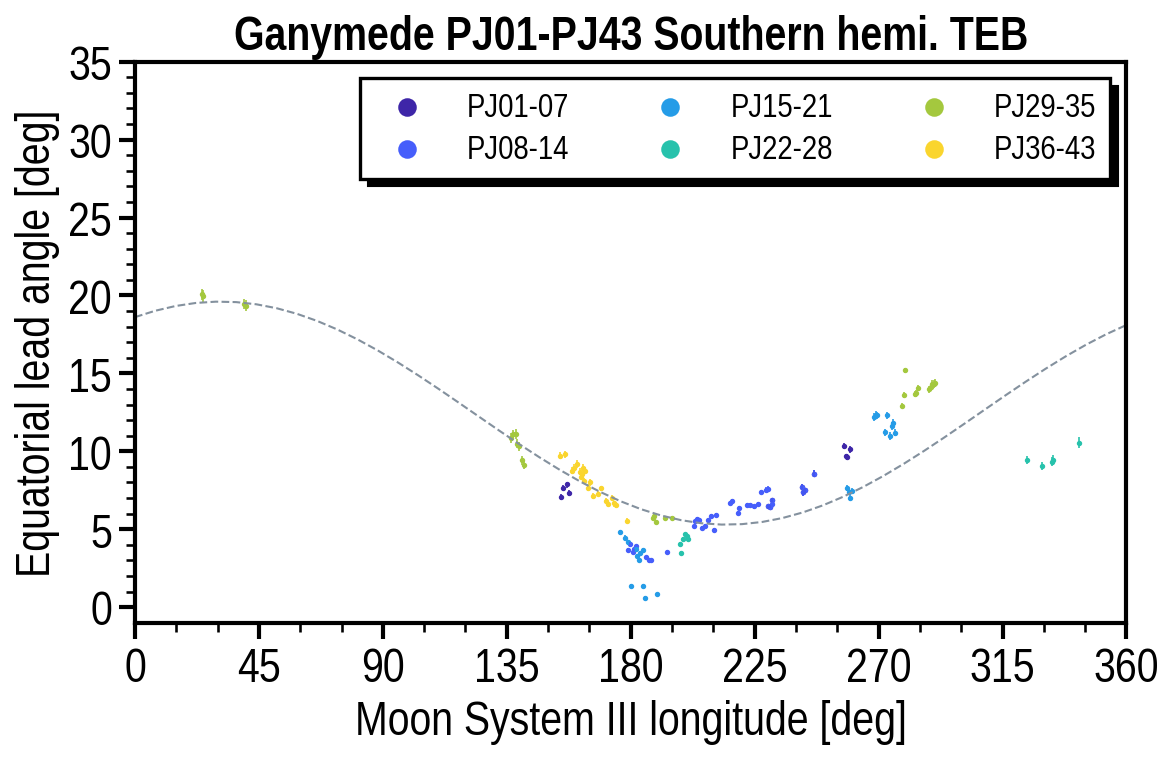

In [20]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(8,5), ticksize=1.5,
                dpi='M')
F.initialize()

ymax = 1
if target == 'Io':
    ymax = 12
elif target == 'Europa':
    ymax = 18
elif target == 'Ganymede':
    ymax = 35

F.set_xaxis(label='Moon System III longitude [deg]',
            min=0, max=360,
            ticks=np.arange(0,360+1,45),
            ticklabels=np.arange(0,360+1,45),
            minor_num=3)
F.set_yaxis(ax_idx=0, label='Equatorial lead angle [deg]',
            min=-1, max=ymax,
            ticks=np.arange(0,ymax+1,5),
            ticklabels=np.arange(0,ymax+1,5),
            minor_num=5)

PJ01_07_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr<=8))
pos = PJ01_07_south
sccolor = F._parula_colors()[0]
F.ax.scatter(moon_s3long_arr[pos], d_TEB_eq_arr[pos], 
             color=sccolor, s=2.5, label='PJ01-07')
F.ax.errorbar(moon_s3long_arr[pos], d_TEB_eq_arr[pos], 
              yerr=np.array([d_TEB_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ08_14_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=8)&(pj_num_arr<=15))
pos = PJ08_14_south
sccolor = F._parula_colors()[45]
F.ax.scatter(moon_s3long_arr[pos], d_TEB_eq_arr[pos], 
             color=sccolor, s=2.5, label='PJ08-14')
F.ax.errorbar(moon_s3long_arr[pos], d_TEB_eq_arr[pos], 
              yerr=np.array([d_TEB_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ15_21_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=15)&(pj_num_arr<=21))
pos = PJ15_21_south
sccolor = F._parula_colors()[90]
F.ax.scatter(moon_s3long_arr[pos], d_TEB_eq_arr[pos], 
             color=sccolor, s=2.5, label='PJ15-21')
F.ax.errorbar(moon_s3long_arr[pos], d_TEB_eq_arr[pos], 
              yerr=np.array([d_TEB_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ22_28_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=22)&(pj_num_arr<=28))
pos = PJ22_28_south
sccolor = F._parula_colors()[135]
F.ax.scatter(moon_s3long_arr[pos], d_TEB_eq_arr[pos], 
             color=sccolor, s=2.5, label='PJ22-28')
F.ax.errorbar(moon_s3long_arr[pos], d_TEB_eq_arr[pos], 
              yerr=np.array([d_TEB_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ29_35_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=29)&(pj_num_arr<=35))
pos = PJ29_35_south
sccolor = F._parula_colors()[180]
F.ax.scatter(moon_s3long_arr[pos], d_TEB_eq_arr[pos], 
             color=sccolor, s=2.5, label='PJ29-35')
F.ax.errorbar(moon_s3long_arr[pos], d_TEB_eq_arr[pos], 
              yerr=np.array([d_TEB_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ36_43_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=36)&(pj_num_arr<=43))
pos = PJ36_43_south
sccolor = F._parula_colors()[230]
F.ax.scatter(moon_s3long_arr[pos], d_TEB_eq_arr[pos], 
             color=sccolor, s=2.5, label='PJ36-43')
F.ax.errorbar(moon_s3long_arr[pos], d_TEB_eq_arr[pos], 
              yerr=np.array([d_TEB_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

F.ax.set_title(fig_title+' Southern hemi. TEB', fontsize=F.fontsize, weight='bold')

x = np.linspace(0, 2*3.141592, 50)
if target=='Io':
    y_N = 4.26+2.64*np.cos(x)+0.50*np.sin(x)+0.20*np.cos(2*x)+0.126*np.sin(2*x)
    y_S = 4.14-1.89*np.cos(x)-0.70*np.sin(x)+0.22*np.cos(2*x)-0.12*np.sin(2*x)
if target=='Europa':
    y_N = 5.78+3.29*np.cos(0.99*x)+1.41*np.sin(0.99*x)
    y_S = 7.06-3.37*np.cos(x)+0.15*np.sin(x)
if target=='Ganymede':
    y_N = 12.45+6.16*np.cos(0.98*x)+3.64*np.sin(0.98*x)
    y_S = 12.97-5.39*np.cos(0.99*x)-4.50*np.sin(0.99*x)

F.ax.plot(np.degrees(x), y_N, linestyle='--', linewidth=1, color=UC.gray)

legend = F.legend(ax_idx=0, loc='upper right', ncol=3, markerscale=5, 
                  fontsize_scale=0.7, textcolor=False)
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

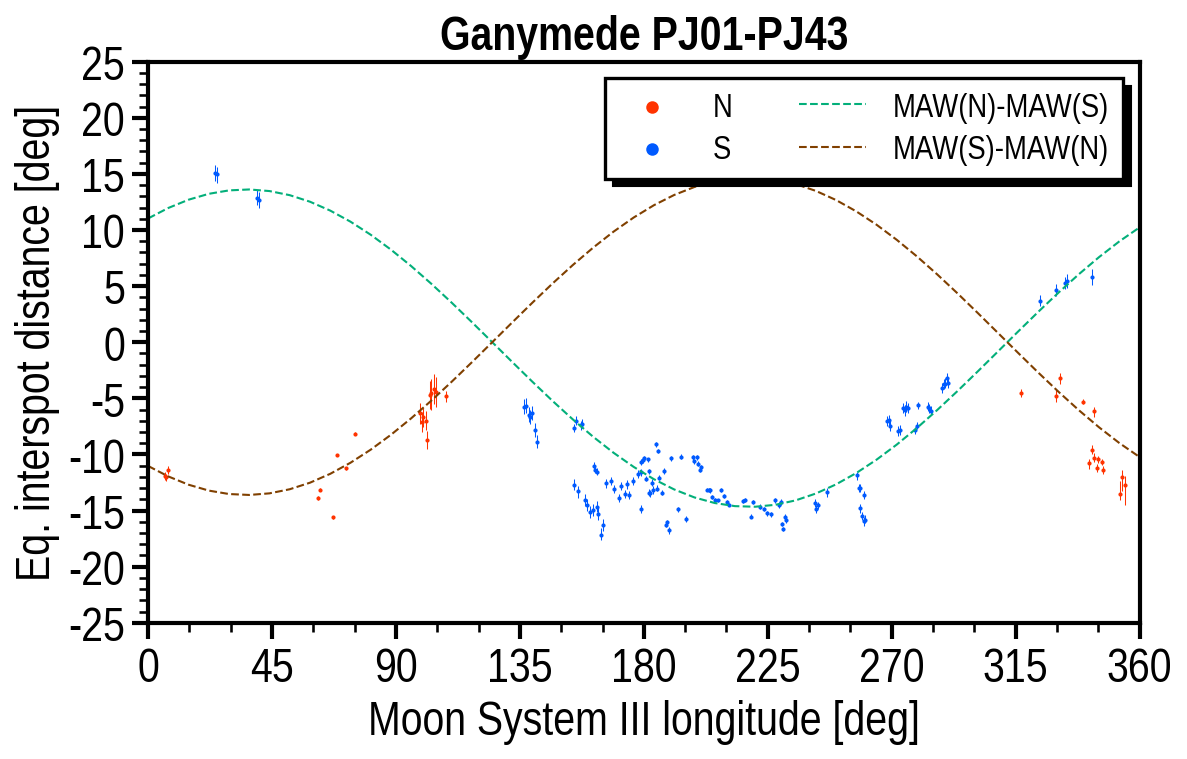

In [21]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(8,5), ticksize=1.5,
                dpi='M')
F.initialize()

ymin = 0
ymax = 1
if target == 'Io':
    ymin = -10
    ymax = 10
elif target == 'Europa':
    ymin = -15
    ymax = 20
elif target == 'Ganymede':
    ymin = -25
    ymax = 25

F.set_xaxis(label='Moon System III longitude [deg]',
            min=0, max=360,
            ticks=np.arange(0,360+1,45),
            ticklabels=np.arange(0,360+1,45),
            minor_num=3)
F.set_yaxis(ax_idx=0, label='Eq. interspot distance [deg]',
            min=-1, max=ymax,
            ticks=np.arange(ymin,ymax+1,5),
            ticklabels=np.arange(ymin,ymax+1,5),
            minor_num=5)

north = np.where(np.array(hemisphere_arr)==b'North')
south = np.where(np.array(hemisphere_arr)==b'South')

F.ax.set_title(fig_title, fontsize=F.fontsize, weight='bold')

x = np.linspace(0, 2*3.141592, 50)
if target=='Io':
    y_N = 4.26+2.64*np.cos(x)+0.50*np.sin(x)+0.20*np.cos(2*x)+0.126*np.sin(2*x)
    y_S = 4.14-1.89*np.cos(x)-0.70*np.sin(x)+0.22*np.cos(2*x)-0.12*np.sin(2*x)
if target=='Europa':
    y_N = 5.78+3.29*np.cos(0.99*x)+1.41*np.sin(0.99*x)
    y_S = 7.06-3.37*np.cos(x)+0.15*np.sin(x)
if target=='Ganymede':
    y_N = 12.45+6.16*np.cos(0.98*x)+3.64*np.sin(0.98*x)
    y_S = 12.97-5.39*np.cos(0.99*x)-4.50*np.sin(0.99*x)

pos = north
F.ax.scatter(moon_s3long_arr[pos], 
             MAW_eq_arr[pos]-TEB_eq_arr[pos], 
             color=UC.red, s=1, label='N')
F.ax.errorbar(moon_s3long_arr[pos], 
              MAW_eq_arr[pos]-TEB_eq_arr[pos], 
              yerr=np.array([d_TEB_eq_arr_0[pos]+d_MAW_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]+d_MAW_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.red)

pos = south
F.ax.scatter(moon_s3long_arr[pos], 
             MAW_eq_arr[pos]-TEB_eq_arr[pos], 
             color=UC.blue, s=1, label='S')
F.ax.errorbar(moon_s3long_arr[pos], 
              MAW_eq_arr[pos]-TEB_eq_arr[pos], 
              yerr=np.array([d_TEB_eq_arr_0[pos]+d_MAW_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]+d_MAW_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.blue)

# F.ax.plot(np.degrees(x), y_N, linestyle='--', linewidth=1, color=UC.gray)
# F.ax.plot(np.degrees(x), y_S, linestyle='--', linewidth=1, color=UC.gray)
F.ax.plot(np.degrees(x), y_N-y_S, linestyle='--', linewidth=1, color=UC.green,
          label='MAW(N)-MAW(S)')
F.ax.plot(np.degrees(x), y_S-y_N, linestyle='--', linewidth=1, color=UC.brown,
          label='MAW(S)-MAW(N)')

legend = F.legend(ax_idx=0, loc='upper right', ncol=2, markerscale=5, 
                  fontsize_scale=0.7, textcolor=False)
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

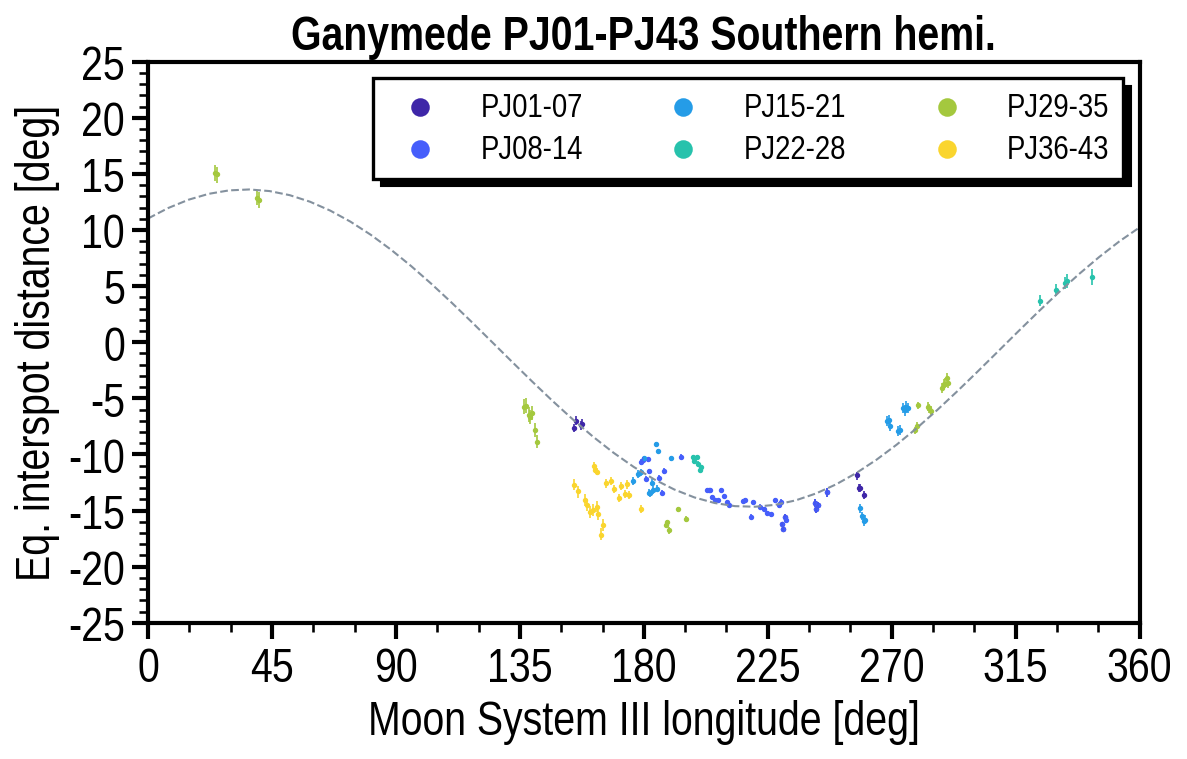

In [22]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(8,5), ticksize=1.5,
                dpi='M')
F.initialize()

ymin = 0
ymax = 1
if target == 'Io':
    ymin = -10
    ymax = 10
elif target == 'Europa':
    ymin = -15
    ymax = 20
elif target == 'Ganymede':
    ymin = -25
    ymax = 25

F.set_xaxis(label='Moon System III longitude [deg]',
            min=0, max=360,
            ticks=np.arange(0,360+1,45),
            ticklabels=np.arange(0,360+1,45),
            minor_num=3)
F.set_yaxis(ax_idx=0, label='Eq. interspot distance [deg]',
            min=-1, max=ymax,
            ticks=np.arange(ymin,ymax+1,5),
            ticklabels=np.arange(ymin,ymax+1,5),
            minor_num=5)

north = np.where(np.array(hemisphere_arr)==b'North')
south = np.where(np.array(hemisphere_arr)==b'South')

F.ax.set_title(fig_title+' Southern hemi.', fontsize=F.fontsize, weight='bold')

x = np.linspace(0, 2*3.141592, 50)
if target=='Io':
    y_N = 4.26+2.64*np.cos(x)+0.50*np.sin(x)+0.20*np.cos(2*x)+0.126*np.sin(2*x)
    y_S = 4.14-1.89*np.cos(x)-0.70*np.sin(x)+0.22*np.cos(2*x)-0.12*np.sin(2*x)
if target=='Europa':
    y_N = 5.78+3.29*np.cos(0.99*x)+1.41*np.sin(0.99*x)
    y_S = 7.06-3.37*np.cos(x)+0.15*np.sin(x)
if target=='Ganymede':
    y_N = 12.45+6.16*np.cos(0.98*x)+3.64*np.sin(0.98*x)
    y_S = 12.97-5.39*np.cos(0.99*x)-4.50*np.sin(0.99*x)

PJ01_07_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr<=8))
pos = PJ01_07_south
sccolor = F._parula_colors()[0]
F.ax.scatter(moon_s3long_arr[pos], 
             MAW_eq_arr[pos]-TEB_eq_arr[pos], 
             color=sccolor, s=2.5, label='PJ01-07')
F.ax.errorbar(moon_s3long_arr[pos], 
              MAW_eq_arr[pos]-TEB_eq_arr[pos], 
              yerr=np.array([d_TEB_eq_arr_0[pos]+d_MAW_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]+d_MAW_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ08_14_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=8)&(pj_num_arr<=15))
pos = PJ08_14_south
sccolor = F._parula_colors()[45]
F.ax.scatter(moon_s3long_arr[pos], 
             MAW_eq_arr[pos]-TEB_eq_arr[pos], 
             color=sccolor, s=2.5, label='PJ08-14')
F.ax.errorbar(moon_s3long_arr[pos], 
              MAW_eq_arr[pos]-TEB_eq_arr[pos], 
              yerr=np.array([d_TEB_eq_arr_0[pos]+d_MAW_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]+d_MAW_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ15_21_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=15)&(pj_num_arr<=21))
pos = PJ15_21_south
sccolor = F._parula_colors()[90]
F.ax.scatter(moon_s3long_arr[pos], 
             MAW_eq_arr[pos]-TEB_eq_arr[pos], 
             color=sccolor, s=2.5, label='PJ15-21')
F.ax.errorbar(moon_s3long_arr[pos], 
              MAW_eq_arr[pos]-TEB_eq_arr[pos], 
              yerr=np.array([d_TEB_eq_arr_0[pos]+d_MAW_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]+d_MAW_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ22_28_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=22)&(pj_num_arr<=28))
pos = PJ22_28_south
sccolor = F._parula_colors()[135]
F.ax.scatter(moon_s3long_arr[pos], 
             MAW_eq_arr[pos]-TEB_eq_arr[pos], 
             color=sccolor, s=2.5, label='PJ22-28')
F.ax.errorbar(moon_s3long_arr[pos], 
              MAW_eq_arr[pos]-TEB_eq_arr[pos], 
              yerr=np.array([d_TEB_eq_arr_0[pos]+d_MAW_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]+d_MAW_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ29_35_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=29)&(pj_num_arr<=35))
pos = PJ29_35_south
sccolor = F._parula_colors()[180]
F.ax.scatter(moon_s3long_arr[pos], 
             MAW_eq_arr[pos]-TEB_eq_arr[pos], 
             color=sccolor, s=2.5, label='PJ29-35')
F.ax.errorbar(moon_s3long_arr[pos], 
              MAW_eq_arr[pos]-TEB_eq_arr[pos], 
              yerr=np.array([d_TEB_eq_arr_0[pos]+d_MAW_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]+d_MAW_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ36_43_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=36)&(pj_num_arr<=43))
pos = PJ36_43_south
sccolor = F._parula_colors()[230]
F.ax.scatter(moon_s3long_arr[pos], 
             MAW_eq_arr[pos]-TEB_eq_arr[pos], 
             color=sccolor, s=2.5, label='PJ36-43')
F.ax.errorbar(moon_s3long_arr[pos], 
              MAW_eq_arr[pos]-TEB_eq_arr[pos], 
              yerr=np.array([d_TEB_eq_arr_0[pos]+d_MAW_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]+d_MAW_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

F.ax.plot(np.degrees(x), y_N-y_S, linestyle='--', linewidth=1, color=UC.gray)

legend = F.legend(ax_idx=0, loc='upper right', ncol=3, markerscale=5, 
                  fontsize_scale=0.7, textcolor=False)
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

Standard deviation
TEB North 2.001141524399813
TEB South 2.4820253574659485


Text(0.99, 0.1, 'South: 2.482 deg')

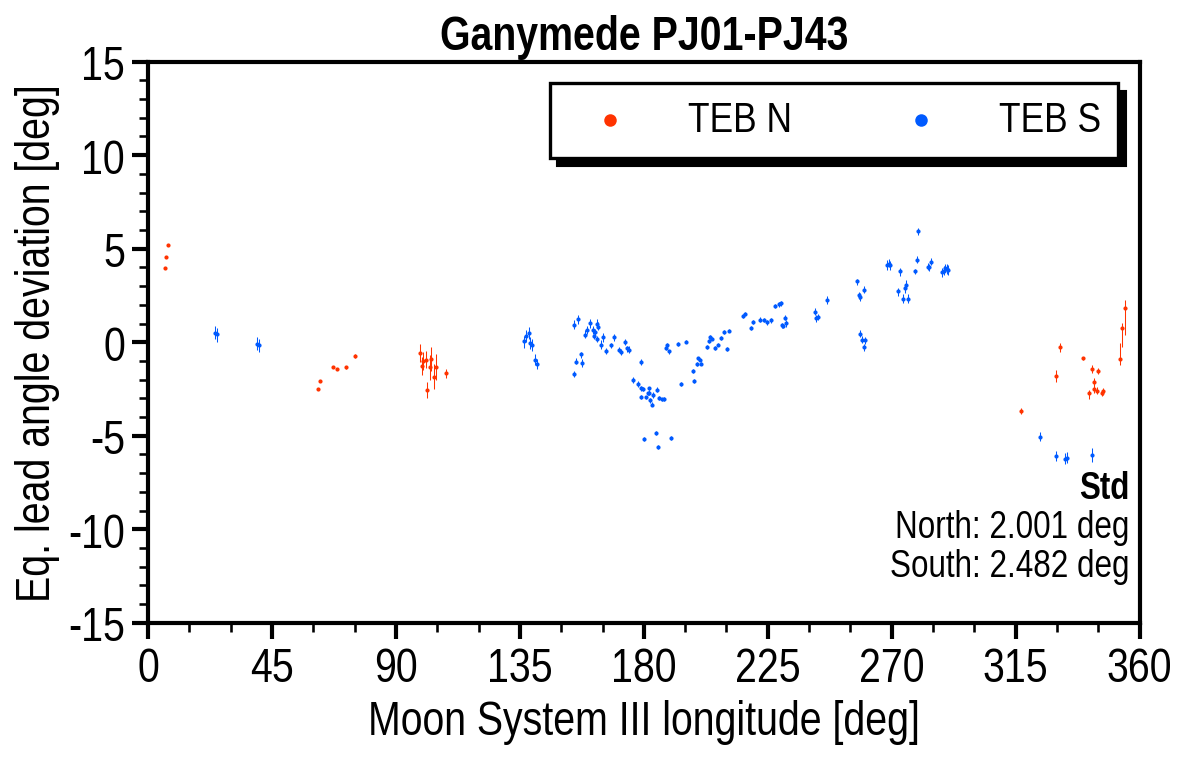

In [23]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(8,5), ticksize=1.5,
                dpi='M')
F.initialize()

ymin = 0
ymax = 1
if target == 'Io':
    ymin = -10
    ymax = 10
elif target == 'Europa':
    ymin = -10
    ymax = 10
elif target == 'Ganymede':
    ymin = -15
    ymax = 15

F.set_xaxis(label='Moon System III longitude [deg]',
            min=0, max=360,
            ticks=np.arange(0,360+1,45),
            ticklabels=np.arange(0,360+1,45),
            minor_num=3)
F.set_yaxis(ax_idx=0, label='Eq. lead angle deviation [deg]',
            min=-1, max=ymax,
            ticks=np.arange(ymin,ymax+1,5),
            ticklabels=np.arange(ymin,ymax+1,5),
            minor_num=5)

F.ax.set_title(fig_title, fontsize=F.fontsize, weight='bold')

north = np.where(np.array(hemisphere_arr)==b'North')
south = np.where(np.array(hemisphere_arr)==b'South')
x0 = np.radians(moon_s3long_arr)
if target=='Io':
    x = x0
    y_N = 4.26+2.64*np.cos(x)+0.50*np.sin(x)+0.20*np.cos(2*x)+0.126*np.sin(2*x)
    y_S = 4.14-1.89*np.cos(x)-0.70*np.sin(x)+0.22*np.cos(2*x)-0.12*np.sin(2*x)
if target=='Europa':
    x = x0
    y_N = 5.78+3.29*np.cos(0.99*x)+1.41*np.sin(0.99*x)
    y_S = 7.06-3.37*np.cos(x)+0.15*np.sin(x)
if target=='Ganymede':
    x = x0
    y_N = 12.45+6.16*np.cos(0.98*x)+3.64*np.sin(0.98*x)
    y_S = 12.97-5.39*np.cos(0.99*x)-4.50*np.sin(0.99*x)

F.ax.scatter(moon_s3long_arr[north], 
             d_TEB_eq_arr[north]-y_S[north], 
             color=UC.red, s=1, label='TEB N')
F.ax.errorbar(moon_s3long_arr[north], d_TEB_eq_arr[north]-y_S[north], 
              yerr=np.array([d_TEB_eq_arr_0[north], 
                             d_TEB_eq_arr_1[north]]),
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.red)

F.ax.scatter(moon_s3long_arr[south], 
             d_TEB_eq_arr[south]-y_N[south], 
             color=UC.blue, s=1, label='TEB S')
F.ax.errorbar(moon_s3long_arr[south], d_TEB_eq_arr[south]-y_N[south], 
              yerr=np.array([d_TEB_eq_arr_0[south], 
                             d_TEB_eq_arr_1[south]]),
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.blue)

legend = F.legend(ax_idx=0, loc='upper right', ncol=2, markerscale=5, 
                  fontsize_scale=0.9, textcolor=False)
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

print('Standard deviation')
print('TEB North', np.std(d_TEB_eq_arr[north]-y_S[north]))
print('TEB South', np.std(d_TEB_eq_arr[south]-y_N[south]))

F.ax.text(0.99, 0.24, 
          'Std',
          color='k', weight='bold',
          fontsize=F.fontsize*0.8,
          verticalalignment='center',
          horizontalalignment='right',
          transform=F.ax.transAxes)
F.ax.text(0.99, 0.17, 
          'North: '+str(round(np.std(d_TEB_eq_arr[north]-y_S[north]),3))+' deg',
          color='k',
          fontsize=F.fontsize*0.8,
          verticalalignment='center',
          horizontalalignment='right',
          transform=F.ax.transAxes)
F.ax.text(0.99, 0.10, 
          'South: '+str(round(np.std(d_TEB_eq_arr[south]-y_N[south]),3))+' deg',
          color='k',
          fontsize=F.fontsize*0.8,
          verticalalignment='center',
          horizontalalignment='right',
          transform=F.ax.transAxes)

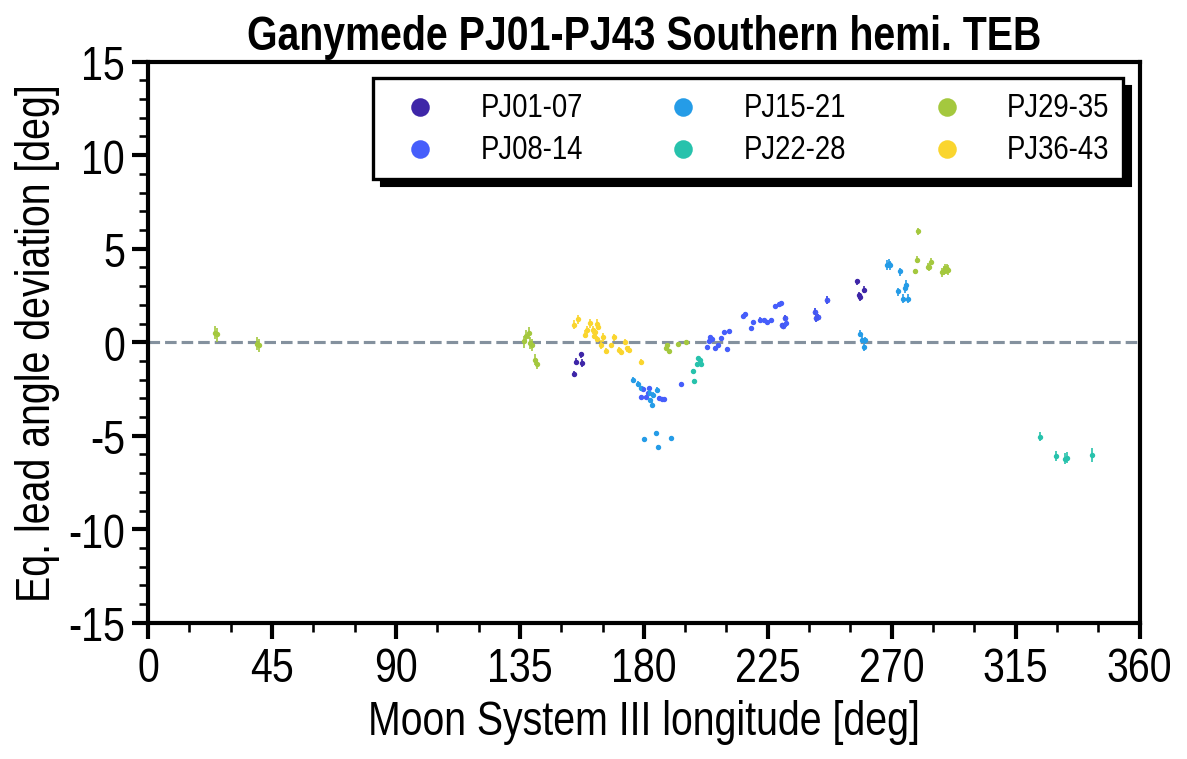

In [24]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(8,5), ticksize=1.5,
                dpi='M')
F.initialize()

ymin = 0
ymax = 1
if target == 'Io':
    ymin = -10
    ymax = 10
elif target == 'Europa':
    ymin = -10
    ymax = 10
elif target == 'Ganymede':
    ymin = -15
    ymax = 15

F.set_xaxis(label='Moon System III longitude [deg]',
            min=0, max=360,
            ticks=np.arange(0,360+1,45),
            ticklabels=np.arange(0,360+1,45),
            minor_num=3)
F.set_yaxis(ax_idx=0, label='Eq. lead angle deviation [deg]',
            min=-1, max=ymax,
            ticks=np.arange(ymin,ymax+1,5),
            ticklabels=np.arange(ymin,ymax+1,5),
            minor_num=5)

F.ax.set_title(fig_title+' Southern hemi. TEB', fontsize=F.fontsize, weight='bold')

north = np.where(np.array(hemisphere_arr)==b'North')
south = np.where(np.array(hemisphere_arr)==b'South')
x0 = np.radians(moon_s3long_arr)
if target=='Io':
    x = x0
    y_N = 4.26+2.64*np.cos(x)+0.50*np.sin(x)+0.20*np.cos(2*x)+0.126*np.sin(2*x)
    y_S = 4.14-1.89*np.cos(x)-0.70*np.sin(x)+0.22*np.cos(2*x)-0.12*np.sin(2*x)
if target=='Europa':
    x = x0
    y_N = 5.78+3.29*np.cos(0.99*x)+1.41*np.sin(0.99*x)
    y_S = 7.06-3.37*np.cos(x)+0.15*np.sin(x)
if target=='Ganymede':
    x = x0
    y_N = 12.45+6.16*np.cos(0.98*x)+3.64*np.sin(0.98*x)
    y_S = 12.97-5.39*np.cos(0.99*x)-4.50*np.sin(0.99*x)

PJ01_07_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr<=8))
pos = PJ01_07_south
sccolor = F._parula_colors()[0]
F.ax.scatter(moon_s3long_arr[pos], 
             d_TEB_eq_arr[pos]-y_N[pos], 
             color=sccolor, s=2.5, label='PJ01-07')
F.ax.errorbar(moon_s3long_arr[pos], d_TEB_eq_arr[pos]-y_N[pos], 
              yerr=np.array([d_TEB_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ08_14_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=8)&(pj_num_arr<=15))
pos = PJ08_14_south
sccolor = F._parula_colors()[45]
F.ax.scatter(moon_s3long_arr[pos], 
             d_TEB_eq_arr[pos]-y_N[pos], 
             color=sccolor, s=2.5, label='PJ08-14')
F.ax.errorbar(moon_s3long_arr[pos], d_TEB_eq_arr[pos]-y_N[pos], 
              yerr=np.array([d_TEB_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ15_21_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=15)&(pj_num_arr<=21))
pos = PJ15_21_south
sccolor = F._parula_colors()[90]
F.ax.scatter(moon_s3long_arr[pos], 
             d_TEB_eq_arr[pos]-y_N[pos], 
             color=sccolor, s=2.5, label='PJ15-21')
F.ax.errorbar(moon_s3long_arr[pos], d_TEB_eq_arr[pos]-y_N[pos], 
              yerr=np.array([d_TEB_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ22_28_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=22)&(pj_num_arr<=28))
pos = PJ22_28_south
sccolor = F._parula_colors()[135]
F.ax.scatter(moon_s3long_arr[pos], 
             d_TEB_eq_arr[pos]-y_N[pos], 
             color=sccolor, s=2.5, label='PJ22-28')
F.ax.errorbar(moon_s3long_arr[pos], d_TEB_eq_arr[pos]-y_N[pos], 
              yerr=np.array([d_TEB_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ29_35_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=29)&(pj_num_arr<=35))
pos = PJ29_35_south
sccolor = F._parula_colors()[180]
F.ax.scatter(moon_s3long_arr[pos], 
             d_TEB_eq_arr[pos]-y_N[pos], 
             color=sccolor, s=2.5, label='PJ29-35')
F.ax.errorbar(moon_s3long_arr[pos], d_TEB_eq_arr[pos]-y_N[pos], 
              yerr=np.array([d_TEB_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ36_43_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=36)&(pj_num_arr<=43))
pos = PJ36_43_south
sccolor = F._parula_colors()[230]
F.ax.scatter(moon_s3long_arr[pos], 
             d_TEB_eq_arr[pos]-y_N[pos], 
             color=sccolor, s=2.5, label='PJ36-43')
F.ax.errorbar(moon_s3long_arr[pos], d_TEB_eq_arr[pos]-y_N[pos], 
              yerr=np.array([d_TEB_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

F.ax.axhline(y=0, color=UC.gray, linestyle='--', zorder=0.9)

legend = F.legend(ax_idx=0, loc='upper right', ncol=3, markerscale=5, 
                  fontsize_scale=0.7, textcolor=False)
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

Standard deviation
MAW North 2.3019246122599304
MAW South 3.6074928859017157


Text(0.99, 0.1, 'South: 3.607 deg')

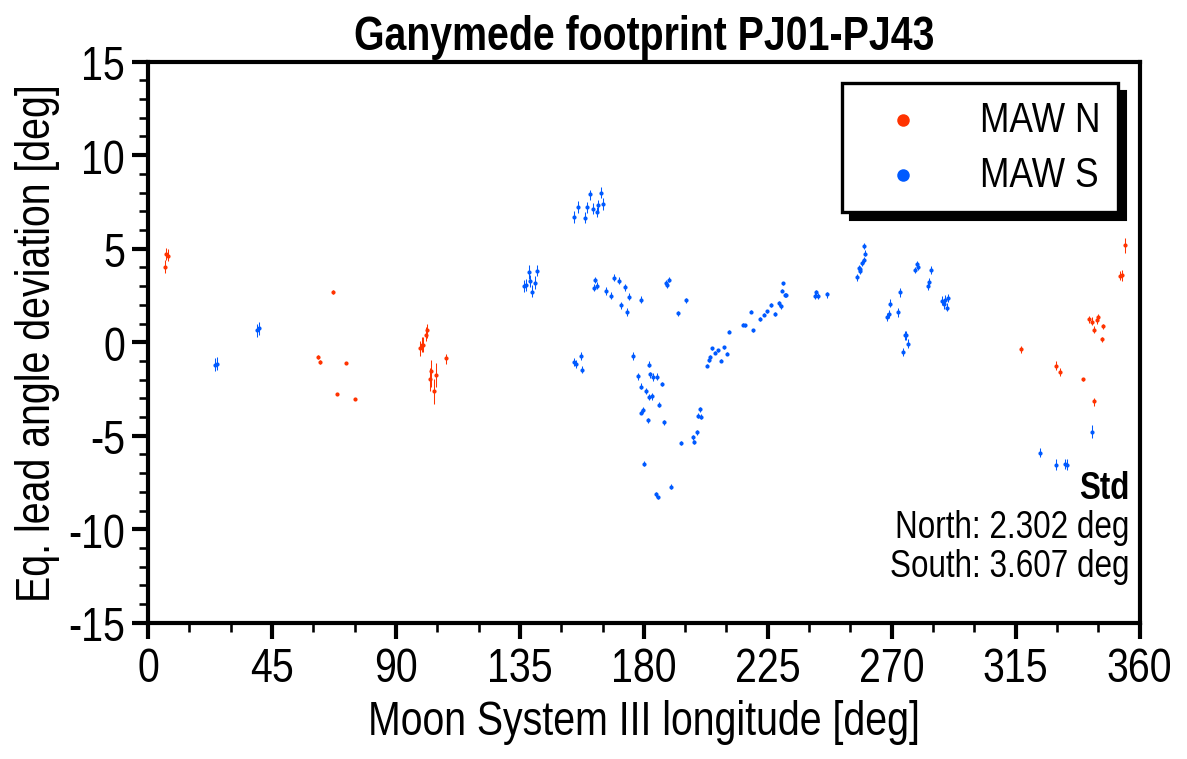

In [25]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(8,5), ticksize=1.5,
                dpi='M')
F.initialize()

ymin = 0
ymax = 1
if target == 'Io':
    ymin = -10
    ymax = 10
elif target == 'Europa':
    ymin = -10
    ymax = 10
elif target == 'Ganymede':
    ymin = -15
    ymax = 15

F.set_xaxis(label='Moon System III longitude [deg]',
            min=0, max=360,
            ticks=np.arange(0,360+1,45),
            ticklabels=np.arange(0,360+1,45),
            minor_num=3)
F.set_yaxis(ax_idx=0, label='Eq. lead angle deviation [deg]',
            min=-1, max=ymax,
            ticks=np.arange(ymin,ymax+1,5),
            ticklabels=np.arange(ymin,ymax+1,5),
            minor_num=5)

F.ax.set_title(target+' footprint PJ01-PJ43', fontsize=F.fontsize, weight='bold')

north = np.where(np.array(hemisphere_arr)==b'North')
south = np.where(np.array(hemisphere_arr)==b'South')
x0 = np.radians(moon_s3long_arr)
if target=='Io':
    x = x0
    y_N = 4.26+2.64*np.cos(x)+0.50*np.sin(x)+0.20*np.cos(2*x)+0.126*np.sin(2*x)
    y_S = 4.14-1.89*np.cos(x)-0.70*np.sin(x)+0.22*np.cos(2*x)-0.12*np.sin(2*x)
if target=='Europa':
    x = x0
    y_N = 5.78+3.29*np.cos(0.99*x)+1.41*np.sin(0.99*x)
    y_S = 7.06-3.37*np.cos(x)+0.15*np.sin(x)
if target=='Ganymede':
    x = x0
    y_N = 12.45+6.16*np.cos(0.98*x)+3.64*np.sin(0.98*x)
    y_S = 12.97-5.39*np.cos(0.99*x)-4.50*np.sin(0.99*x)

F.ax.scatter(moon_s3long_arr[north], d_MAW_eq_arr[north]-y_N[north], 
             color=UC.red, s=1, label='MAW N')
F.ax.errorbar(moon_s3long_arr[north], d_MAW_eq_arr[north]-y_N[north], 
              yerr=np.array([d_MAW_eq_arr_0[north], 
                             d_MAW_eq_arr_1[north]]),
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.red)

F.ax.scatter(moon_s3long_arr[south], d_MAW_eq_arr[south]-y_S[south], 
             color=UC.blue, s=1, label='MAW S')
F.ax.errorbar(moon_s3long_arr[south], d_MAW_eq_arr[south]-y_S[south], 
              yerr=np.array([d_MAW_eq_arr_0[south], 
                             d_MAW_eq_arr_1[south]]),
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.blue)

legend = F.legend(ax_idx=0, loc='upper right', markerscale=5)
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

print('Standard deviation')
print('MAW North', np.std(d_MAW_eq_arr[north]-y_N[north]))
print('MAW South', np.std(d_MAW_eq_arr[south]-y_S[south]))

F.ax.text(0.99, 0.24, 
          'Std',
          color='k', weight='bold',
          fontsize=F.fontsize*0.8,
          verticalalignment='center',
          horizontalalignment='right',
          transform=F.ax.transAxes)
F.ax.text(0.99, 0.17, 
          'North: '+str(round(np.std(d_MAW_eq_arr[north]-y_N[north]),3))+' deg',
          color='k',
          fontsize=F.fontsize*0.8,
          verticalalignment='center',
          horizontalalignment='right',
          transform=F.ax.transAxes)
F.ax.text(0.99, 0.10, 
          'South: '+str(round(np.std(d_MAW_eq_arr[south]-y_S[south]),3))+' deg',
          color='k',
          fontsize=F.fontsize*0.8,
          verticalalignment='center',
          horizontalalignment='right',
          transform=F.ax.transAxes)

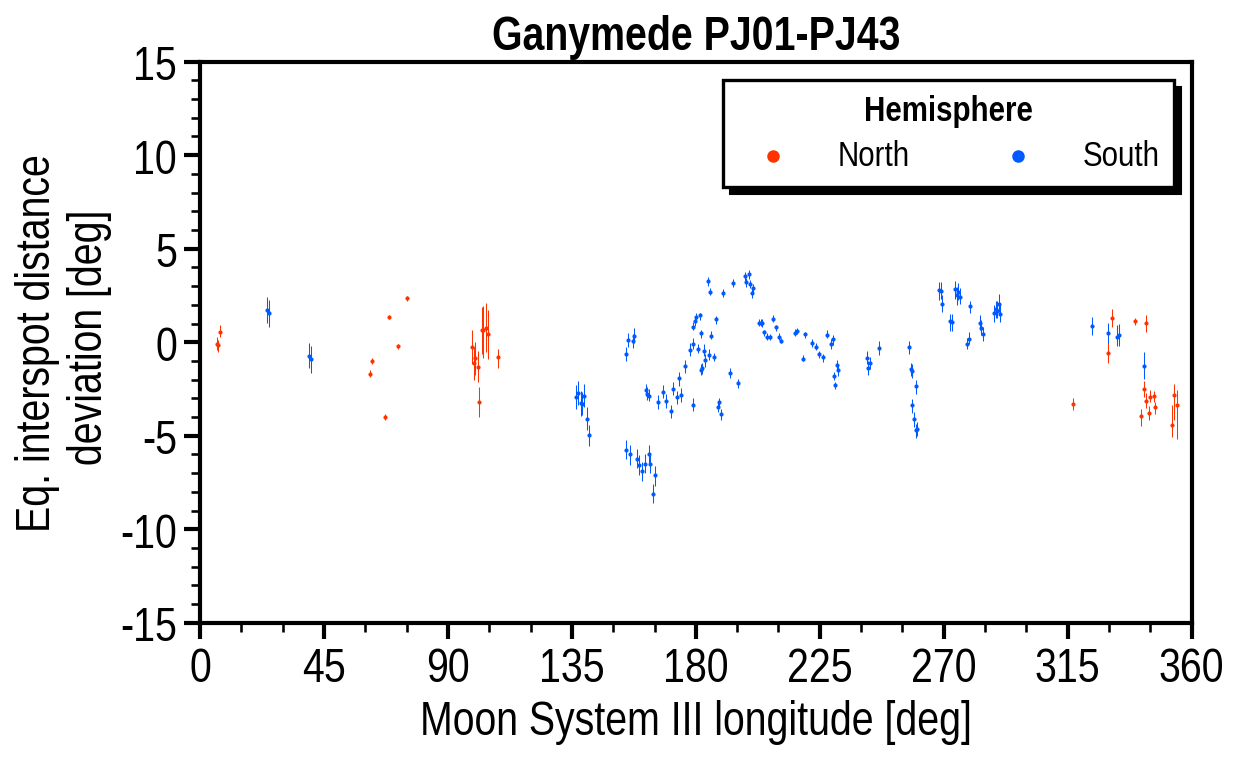

In [26]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(8,5), ticksize=1.5,
                dpi='M')
F.initialize()

ymin = 0
ymax = 1
if target == 'Io':
    ymin = -10
    ymax = 10
elif target == 'Europa':
    ymin = -10
    ymax = 10
elif target == 'Ganymede':
    ymin = -15
    ymax = 15

F.set_xaxis(label='Moon System III longitude [deg]',
            min=0, max=360,
            ticks=np.arange(0,360+1,45),
            ticklabels=np.arange(0,360+1,45),
            minor_num=3)
F.set_yaxis(ax_idx=0, label='Eq. interspot distance\n deviation [deg]',
            min=-1, max=ymax,
            ticks=np.arange(ymin,ymax+1,5),
            ticklabels=np.arange(ymin,ymax+1,5),
            minor_num=5)

F.ax.set_title(fig_title, fontsize=F.fontsize, weight='bold')

north = np.where(np.array(hemisphere_arr)==b'North')
south = np.where(np.array(hemisphere_arr)==b'South')
x0 = np.radians(moon_s3long_arr)
if target=='Io':
    x = x0
    y_N = 4.26+2.64*np.cos(x)+0.50*np.sin(x)+0.20*np.cos(2*x)+0.126*np.sin(2*x)
    y_S = 4.14-1.89*np.cos(x)-0.70*np.sin(x)+0.22*np.cos(2*x)-0.12*np.sin(2*x)
if target=='Europa':
    x = x0
    y_N = 5.78+3.29*np.cos(0.99*x)+1.41*np.sin(0.99*x)
    y_S = 7.06-3.37*np.cos(x)+0.15*np.sin(x)
if target=='Ganymede':
    x = x0
    y_N = 12.45+6.16*np.cos(0.98*x)+3.64*np.sin(0.98*x)
    y_S = 12.97-5.39*np.cos(0.99*x)-4.50*np.sin(0.99*x)

# F.ax.plot(np.degrees(x), y_N, linestyle='--', linewidth=1, color=UC.gray)
# F.ax.plot(np.degrees(x), y_S, linestyle='--', linewidth=1, color=UC.gray)

pos = north
F.ax.scatter(moon_s3long_arr[pos], 
             (MAW_eq_arr[pos]-TEB_eq_arr[pos])-(y_S[pos]-y_N[pos]), 
             color=UC.red, s=1, label='North')
F.ax.errorbar(moon_s3long_arr[pos], 
              (MAW_eq_arr[pos]-TEB_eq_arr[pos])-(y_S[pos]-y_N[pos]), 
              yerr=np.array([d_MAW_eq_arr_0[pos]+d_TEB_eq_arr_0[pos], 
                             d_MAW_eq_arr_1[pos]+d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.red)

pos = south
F.ax.scatter(moon_s3long_arr[pos], 
             (MAW_eq_arr[pos]-TEB_eq_arr[pos])-(y_N[pos]-y_S[pos]), 
             color=UC.blue, s=1, label='South')
F.ax.errorbar(moon_s3long_arr[pos], 
              (MAW_eq_arr[pos]-TEB_eq_arr[pos])-(y_N[pos]-y_S[pos]), 
              yerr=np.array([d_MAW_eq_arr_0[pos]+d_TEB_eq_arr_0[pos], 
                             d_MAW_eq_arr_1[pos]+d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.blue)


legend = F.legend(ax_idx=0, loc='upper right', ncol=2, markerscale=5, 
                  title='Hemisphere', fontsize_scale=0.75, textcolor=False)
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

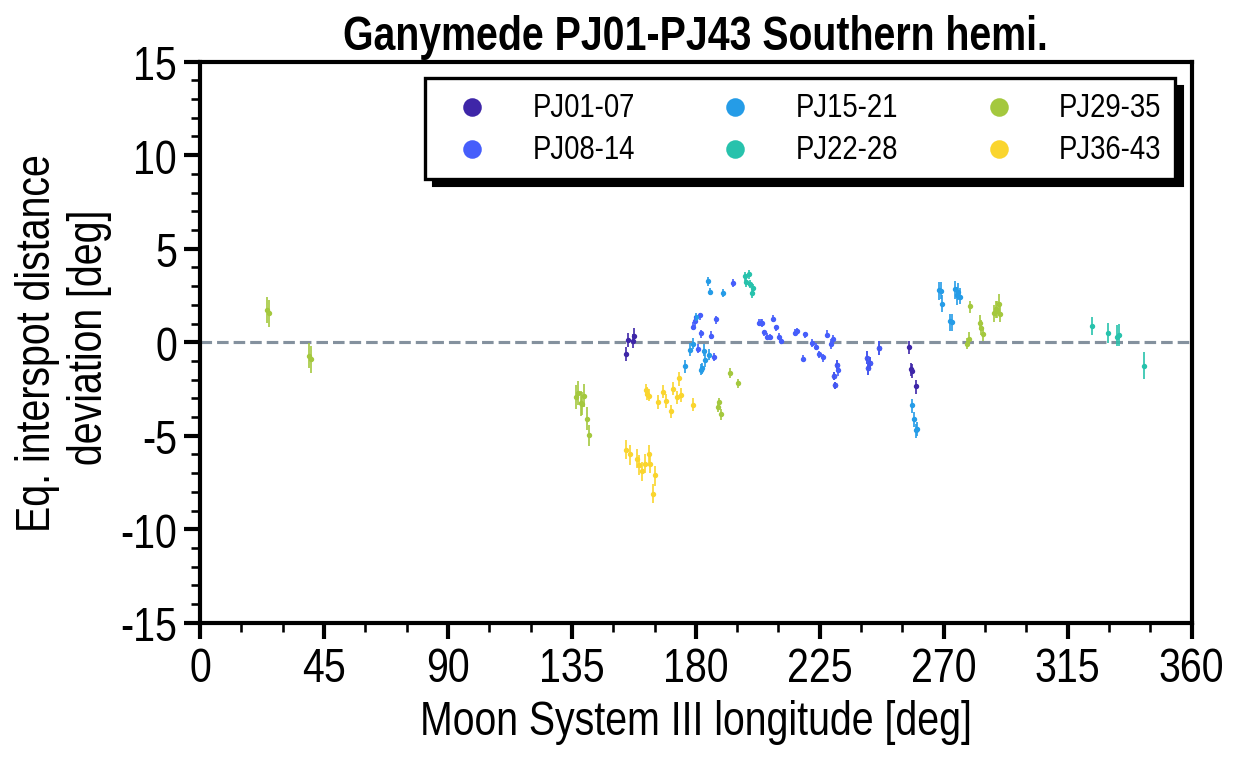

In [27]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(8,5), ticksize=1.5,
                dpi='M')
F.initialize()

ymin = 0
ymax = 1
if target == 'Io':
    ymin = -10
    ymax = 10
elif target == 'Europa':
    ymin = -10
    ymax = 10
elif target == 'Ganymede':
    ymin = -15
    ymax = 15

F.set_xaxis(label='Moon System III longitude [deg]',
            min=0, max=360,
            ticks=np.arange(0,360+1,45),
            ticklabels=np.arange(0,360+1,45),
            minor_num=3)
F.set_yaxis(ax_idx=0, label='Eq. interspot distance\n deviation [deg]',
            min=-1, max=ymax,
            ticks=np.arange(ymin,ymax+1,5),
            ticklabels=np.arange(ymin,ymax+1,5),
            minor_num=5)

F.ax.set_title(fig_title+' Southern hemi.', fontsize=F.fontsize, weight='bold')

north = np.where(np.array(hemisphere_arr)==b'North')
south = np.where(np.array(hemisphere_arr)==b'South')
x0 = np.radians(moon_s3long_arr)
if target=='Io':
    x = x0
    y_N = 4.26+2.64*np.cos(x)+0.50*np.sin(x)+0.20*np.cos(2*x)+0.126*np.sin(2*x)
    y_S = 4.14-1.89*np.cos(x)-0.70*np.sin(x)+0.22*np.cos(2*x)-0.12*np.sin(2*x)
if target=='Europa':
    x = x0
    y_N = 5.78+3.29*np.cos(0.99*x)+1.41*np.sin(0.99*x)
    y_S = 7.06-3.37*np.cos(x)+0.15*np.sin(x)
if target=='Ganymede':
    x = x0
    y_N = 12.45+6.16*np.cos(0.98*x)+3.64*np.sin(0.98*x)
    y_S = 12.97-5.39*np.cos(0.99*x)-4.50*np.sin(0.99*x)

PJ01_07_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr<=8))
pos = PJ01_07_south
sccolor = F._parula_colors()[0]
F.ax.scatter(moon_s3long_arr[pos], 
             (MAW_eq_arr[pos]-TEB_eq_arr[pos])-(y_N[pos]-y_S[pos]), 
             color=sccolor, s=2.5, label='PJ01-07')
F.ax.errorbar(moon_s3long_arr[pos], 
              (MAW_eq_arr[pos]-TEB_eq_arr[pos])-(y_N[pos]-y_S[pos]), 
              yerr=np.array([d_MAW_eq_arr_0[pos]+d_TEB_eq_arr_0[pos], 
                             d_MAW_eq_arr_1[pos]+d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ08_14_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=8)&(pj_num_arr<=15))
pos = PJ08_14_south
sccolor = F._parula_colors()[45]
F.ax.scatter(moon_s3long_arr[pos], 
             (MAW_eq_arr[pos]-TEB_eq_arr[pos])-(y_N[pos]-y_S[pos]), 
             color=sccolor, s=2.5, label='PJ08-14')
F.ax.errorbar(moon_s3long_arr[pos], 
              (MAW_eq_arr[pos]-TEB_eq_arr[pos])-(y_N[pos]-y_S[pos]), 
              yerr=np.array([d_MAW_eq_arr_0[pos]+d_TEB_eq_arr_0[pos], 
                             d_MAW_eq_arr_1[pos]+d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ15_21_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=15)&(pj_num_arr<=21))
pos = PJ15_21_south
sccolor = F._parula_colors()[90]
F.ax.scatter(moon_s3long_arr[pos], 
             (MAW_eq_arr[pos]-TEB_eq_arr[pos])-(y_N[pos]-y_S[pos]), 
             color=sccolor, s=2.5, label='PJ15-21')
F.ax.errorbar(moon_s3long_arr[pos], 
              (MAW_eq_arr[pos]-TEB_eq_arr[pos])-(y_N[pos]-y_S[pos]), 
              yerr=np.array([d_MAW_eq_arr_0[pos]+d_TEB_eq_arr_0[pos], 
                             d_MAW_eq_arr_1[pos]+d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ22_28_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=22)&(pj_num_arr<=28))
pos = PJ22_28_south
sccolor = F._parula_colors()[135]
F.ax.scatter(moon_s3long_arr[pos], 
             (MAW_eq_arr[pos]-TEB_eq_arr[pos])-(y_N[pos]-y_S[pos]), 
             color=sccolor, s=2.5, label='PJ22-28')
F.ax.errorbar(moon_s3long_arr[pos], 
              (MAW_eq_arr[pos]-TEB_eq_arr[pos])-(y_N[pos]-y_S[pos]), 
              yerr=np.array([d_MAW_eq_arr_0[pos]+d_TEB_eq_arr_0[pos], 
                             d_MAW_eq_arr_1[pos]+d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ29_35_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=29)&(pj_num_arr<=35))
pos = PJ29_35_south
sccolor = F._parula_colors()[180]
F.ax.scatter(moon_s3long_arr[pos], 
             (MAW_eq_arr[pos]-TEB_eq_arr[pos])-(y_N[pos]-y_S[pos]), 
             color=sccolor, s=2.5, label='PJ29-35')
F.ax.errorbar(moon_s3long_arr[pos], 
              (MAW_eq_arr[pos]-TEB_eq_arr[pos])-(y_N[pos]-y_S[pos]), 
              yerr=np.array([d_MAW_eq_arr_0[pos]+d_TEB_eq_arr_0[pos], 
                             d_MAW_eq_arr_1[pos]+d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ36_43_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=36)&(pj_num_arr<=43))
pos = PJ36_43_south
sccolor = F._parula_colors()[230]
F.ax.scatter(moon_s3long_arr[pos], 
             (MAW_eq_arr[pos]-TEB_eq_arr[pos])-(y_N[pos]-y_S[pos]), 
             color=sccolor, s=2.5, label='PJ36-43')
F.ax.errorbar(moon_s3long_arr[pos], 
              (MAW_eq_arr[pos]-TEB_eq_arr[pos])-(y_N[pos]-y_S[pos]), 
              yerr=np.array([d_MAW_eq_arr_0[pos]+d_TEB_eq_arr_0[pos], 
                             d_MAW_eq_arr_1[pos]+d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

F.ax.axhline(y=0, color=UC.gray, linestyle='--', zorder=0.9)

legend = F.legend(ax_idx=0, loc='upper right', ncol=3, markerscale=5, 
                  fontsize_scale=0.7, textcolor=False)
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

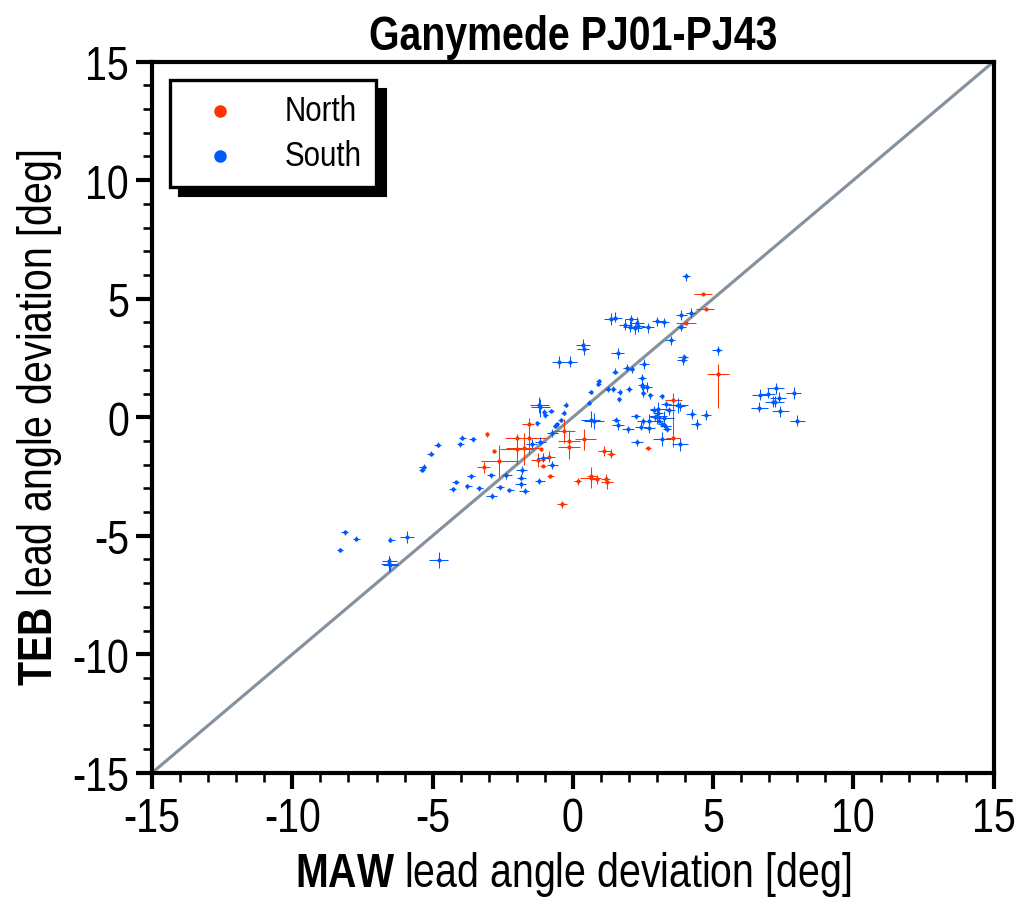

In [28]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(7,6), ticksize=1.5,
                dpi='M')
F.initialize()

if target == 'Io':
    ymin = -5
    ymax = 5
elif target == 'Europa':
    ymin = -10
    ymax = 10
elif target == 'Ganymede':
    ymin = -15
    ymax = 15

F.set_xaxis(label='$\\bf{MAW}$ lead angle deviation [deg]',
            min=ymin, max=ymax,
            ticks=np.arange(ymin,ymax+1,5),
            ticklabels=np.arange(ymin,ymax+1,5),
            minor_num=5)
F.set_yaxis(ax_idx=0, label='$\\bf{TEB}$ lead angle deviation [deg]',
            min=ymin, max=ymax,
            ticks=np.arange(ymin,ymax+1,5),
            ticklabels=np.arange(ymin,ymax+1,5),
            minor_num=5)

north = np.where(np.array(hemisphere_arr)==b'North')
south = np.where(np.array(hemisphere_arr)==b'South')
x0 = np.radians(moon_s3long_arr)
if target=='Io':
    x = x0
    y_N = 4.26+2.64*np.cos(x)+0.50*np.sin(x)+0.20*np.cos(2*x)+0.126*np.sin(2*x)
    y_S = 4.14-1.89*np.cos(x)-0.70*np.sin(x)+0.22*np.cos(2*x)-0.12*np.sin(2*x)
if target=='Europa':
    x = x0
    y_N = 5.78+3.29*np.cos(0.99*x)+1.41*np.sin(0.99*x)
    y_S = 7.06-3.37*np.cos(x)+0.15*np.sin(x)
if target=='Ganymede':
    x = x0
    y_N = 12.45+6.16*np.cos(0.98*x)+3.64*np.sin(0.98*x)
    y_S = 12.97-5.39*np.cos(0.99*x)-4.50*np.sin(0.99*x)

F.ax.scatter(d_MAW_eq_arr[north]-y_N[north], 
             d_TEB_eq_arr[north]-y_S[north], 
             color=UC.red, s=1, label='North')
F.ax.errorbar(d_MAW_eq_arr[north]-y_N[north], 
              d_TEB_eq_arr[north]-y_S[north], 
              xerr=np.array([d_MAW_eq_arr_0[north], 
                             d_MAW_eq_arr_1[north]]),
              yerr=np.array([d_TEB_eq_arr_0[north], 
                             d_TEB_eq_arr_1[north]]),
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.red)

F.ax.scatter(d_MAW_eq_arr[south]-y_S[south], 
             d_TEB_eq_arr[south]-y_N[south], 
             color=UC.blue, s=1, label='South')
F.ax.errorbar(d_MAW_eq_arr[south]-y_S[south], 
              d_TEB_eq_arr[south]-y_N[south], 
              xerr=np.array([d_MAW_eq_arr_0[south], 
                             d_MAW_eq_arr_1[south]]),
              yerr=np.array([d_TEB_eq_arr_0[south], 
                             d_TEB_eq_arr_1[south]]),
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.blue)

F.ax.plot(np.array([-15,15]), np.array([-15,15]), color=UC.gray, zorder=0.9)

F.ax.set_title(fig_title, fontsize=F.fontsize, weight='bold')

legend = F.legend(ax_idx=0, loc='upper left', ncol=1, markerscale=5, 
                  fontsize_scale=0.75, textcolor=False)
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

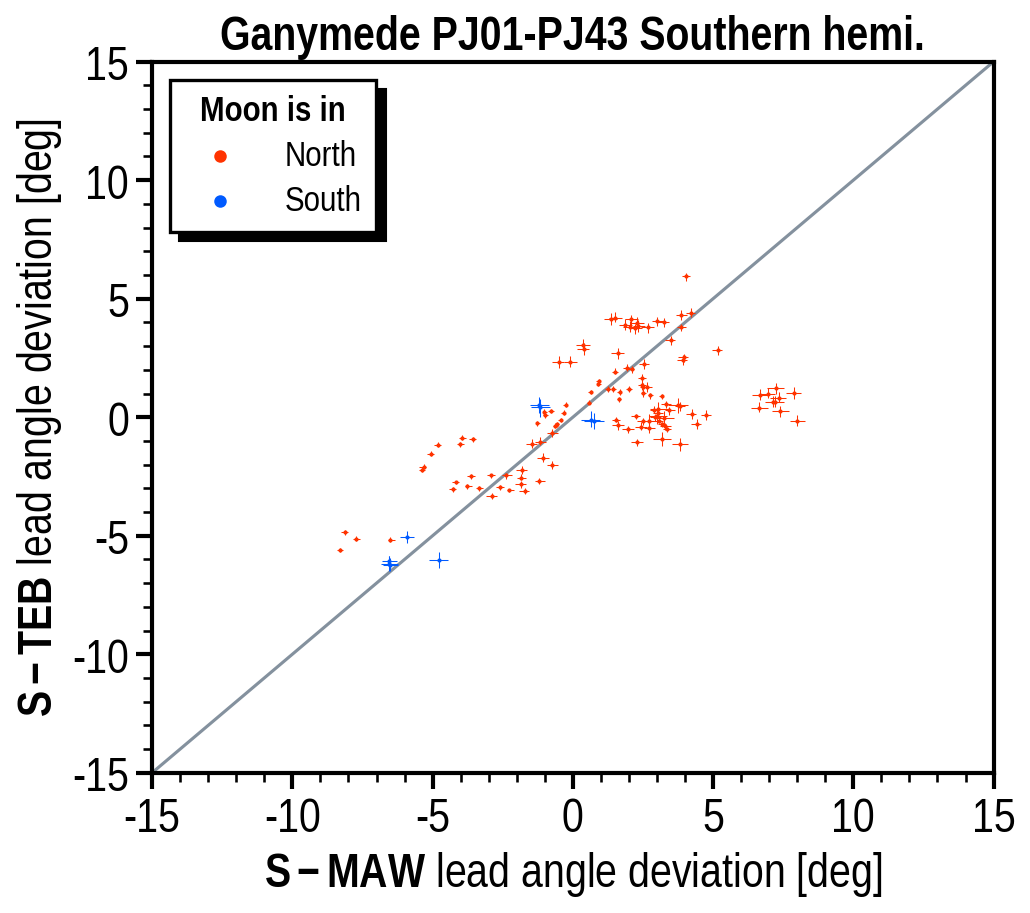

In [29]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(7,6), ticksize=1.5,
                dpi='M')
F.initialize()

if target == 'Io':
    ymin = -5
    ymax = 5
elif target == 'Europa':
    ymin = -10
    ymax = 10
elif target == 'Ganymede':
    ymin = -15
    ymax = 15

F.set_xaxis(label='$\\bf{S-MAW}$ lead angle deviation [deg]',
            min=ymin, max=ymax,
            ticks=np.arange(ymin,ymax+1,5),
            ticklabels=np.arange(ymin,ymax+1,5),
            minor_num=5)
F.set_yaxis(ax_idx=0, label='$\\bf{S-TEB}$ lead angle deviation [deg]',
            min=ymin, max=ymax,
            ticks=np.arange(ymin,ymax+1,5),
            ticklabels=np.arange(ymin,ymax+1,5),
            minor_num=5)

north = np.where(np.array(hemisphere_arr)==b'North')
south = np.where(np.array(hemisphere_arr)==b'South')
Shemi_Smoon = np.where((np.array(hemisphere_arr)==b'South')&((moon_s3long_arr<114)|(moon_s3long_arr>294)))
Shemi_Nmoon = np.where((np.array(hemisphere_arr)==b'South')&((moon_s3long_arr>=114)&(moon_s3long_arr<=294)))
x0 = np.radians(moon_s3long_arr)
if target=='Io':
    x = x0
    y_N = 4.26+2.64*np.cos(x)+0.50*np.sin(x)+0.20*np.cos(2*x)+0.126*np.sin(2*x)
    y_S = 4.14-1.89*np.cos(x)-0.70*np.sin(x)+0.22*np.cos(2*x)-0.12*np.sin(2*x)
if target=='Europa':
    x = x0
    y_N = 5.78+3.29*np.cos(0.99*x)+1.41*np.sin(0.99*x)
    y_S = 7.06-3.37*np.cos(x)+0.15*np.sin(x)
if target=='Ganymede':
    x = x0
    y_N = 12.45+6.16*np.cos(0.98*x)+3.64*np.sin(0.98*x)
    y_S = 12.97-5.39*np.cos(0.99*x)-4.50*np.sin(0.99*x)

F.ax.scatter(d_MAW_eq_arr[Shemi_Nmoon]-y_S[Shemi_Nmoon], 
             d_TEB_eq_arr[Shemi_Nmoon]-y_N[Shemi_Nmoon], 
             color=UC.red, s=1, label='North')
F.ax.errorbar(d_MAW_eq_arr[Shemi_Nmoon]-y_S[Shemi_Nmoon], 
              d_TEB_eq_arr[Shemi_Nmoon]-y_N[Shemi_Nmoon], 
              xerr=np.array([d_MAW_eq_arr_0[Shemi_Nmoon], 
                             d_MAW_eq_arr_1[Shemi_Nmoon]]),
              yerr=np.array([d_TEB_eq_arr_0[Shemi_Nmoon], 
                             d_TEB_eq_arr_1[Shemi_Nmoon]]),
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.red)

F.ax.scatter(d_MAW_eq_arr[Shemi_Smoon]-y_S[Shemi_Smoon], 
             d_TEB_eq_arr[Shemi_Smoon]-y_N[Shemi_Smoon], 
             color=UC.blue, s=1, label='South')
F.ax.errorbar(d_MAW_eq_arr[Shemi_Smoon]-y_S[Shemi_Smoon], 
              d_TEB_eq_arr[Shemi_Smoon]-y_N[Shemi_Smoon], 
              xerr=np.array([d_MAW_eq_arr_0[Shemi_Smoon], 
                             d_MAW_eq_arr_1[Shemi_Smoon]]),
              yerr=np.array([d_TEB_eq_arr_0[Shemi_Smoon], 
                             d_TEB_eq_arr_1[Shemi_Smoon]]),
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.blue)

F.ax.plot(np.array([-15,15]), np.array([-15,15]), color=UC.gray, zorder=0.9)

F.ax.set_title(fig_title+' Southern hemi.', fontsize=F.fontsize, weight='bold')

legend = F.legend(ax_idx=0, loc='upper left', ncol=1, markerscale=5, 
                  fontsize_scale=0.75, textcolor=False,
                  title='Moon is in')
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

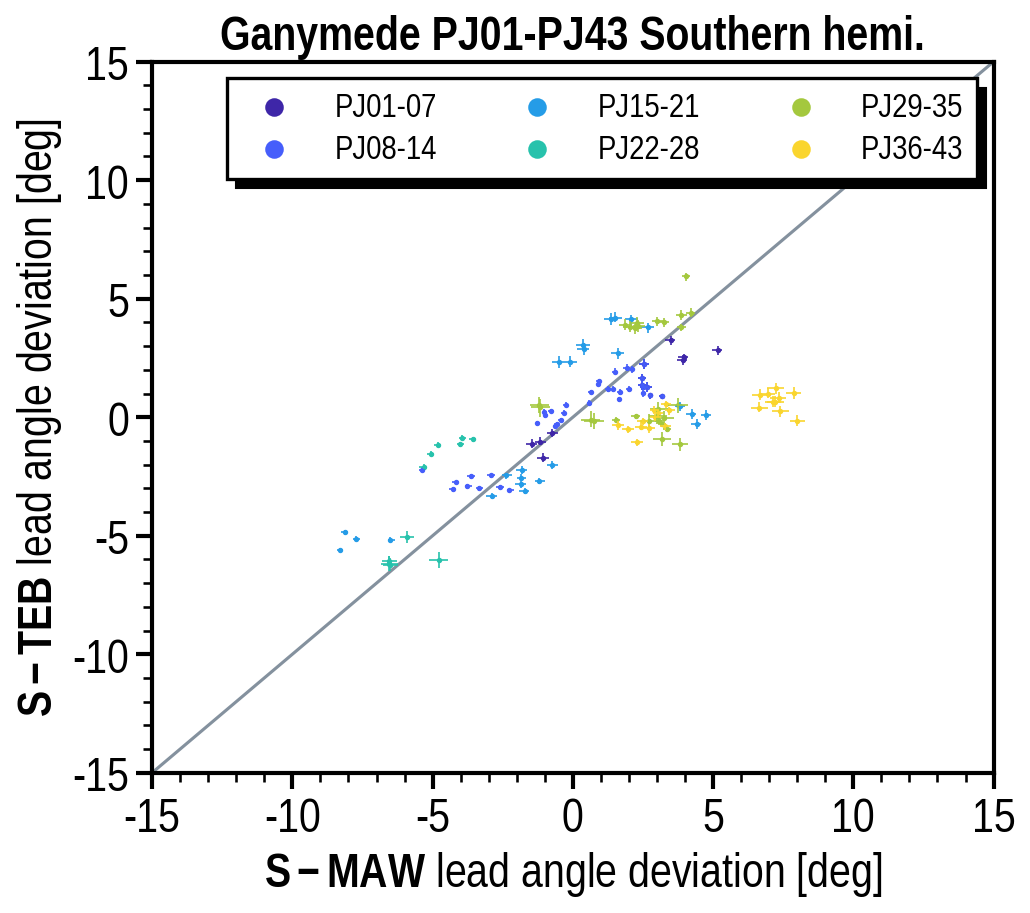

In [30]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(7,6), ticksize=1.5,
                dpi='M')
F.initialize()

if target == 'Io':
    ymin = -5
    ymax = 5
elif target == 'Europa':
    ymin = -10
    ymax = 10
elif target == 'Ganymede':
    ymin = -15
    ymax = 15

F.set_xaxis(label='$\\bf{S-MAW}$ lead angle deviation [deg]',
            min=ymin, max=ymax,
            ticks=np.arange(ymin,ymax+1,5),
            ticklabels=np.arange(ymin,ymax+1,5),
            minor_num=5)
F.set_yaxis(ax_idx=0, label='$\\bf{S-TEB}$ lead angle deviation [deg]',
            min=ymin, max=ymax,
            ticks=np.arange(ymin,ymax+1,5),
            ticklabels=np.arange(ymin,ymax+1,5),
            minor_num=5)

north = np.where(np.array(hemisphere_arr)==b'North')
south = np.where(np.array(hemisphere_arr)==b'South')
Shemi_Smoon = np.where((np.array(hemisphere_arr)==b'South')&((moon_s3long_arr<114)|(moon_s3long_arr>294)))
Shemi_Nmoon = np.where((np.array(hemisphere_arr)==b'South')&((moon_s3long_arr>=114)&(moon_s3long_arr<=294)))
x0 = np.radians(moon_s3long_arr)
if target=='Io':
    x = x0
    y_N = 4.26+2.64*np.cos(x)+0.50*np.sin(x)+0.20*np.cos(2*x)+0.126*np.sin(2*x)
    y_S = 4.14-1.89*np.cos(x)-0.70*np.sin(x)+0.22*np.cos(2*x)-0.12*np.sin(2*x)
if target=='Europa':
    x = x0
    y_N = 5.78+3.29*np.cos(0.99*x)+1.41*np.sin(0.99*x)
    y_S = 7.06-3.37*np.cos(x)+0.15*np.sin(x)
if target=='Ganymede':
    x = x0
    y_N = 12.45+6.16*np.cos(0.98*x)+3.64*np.sin(0.98*x)
    y_S = 12.97-5.39*np.cos(0.99*x)-4.50*np.sin(0.99*x)

PJ01_07_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr<=8))
pos = PJ01_07_south
sccolor = F._parula_colors()[0]
F.ax.scatter(d_MAW_eq_arr[pos]-y_S[pos], 
             d_TEB_eq_arr[pos]-y_N[pos], 
             color=sccolor, s=2.5, label='PJ01-07')
F.ax.errorbar(d_MAW_eq_arr[pos]-y_S[pos], 
              d_TEB_eq_arr[pos]-y_N[pos], 
              xerr=np.array([d_MAW_eq_arr_0[pos], 
                             d_MAW_eq_arr_1[pos]]),
              yerr=np.array([d_TEB_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ08_14_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=8)&(pj_num_arr<=15))
pos = PJ08_14_south
sccolor = F._parula_colors()[45]
F.ax.scatter(d_MAW_eq_arr[pos]-y_S[pos], 
             d_TEB_eq_arr[pos]-y_N[pos], 
             color=sccolor, s=2.5, label='PJ08-14')
F.ax.errorbar(d_MAW_eq_arr[pos]-y_S[pos], 
              d_TEB_eq_arr[pos]-y_N[pos], 
              xerr=np.array([d_MAW_eq_arr_0[pos], 
                             d_MAW_eq_arr_1[pos]]),
              yerr=np.array([d_TEB_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ15_21_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=15)&(pj_num_arr<=21))
pos = PJ15_21_south
sccolor = F._parula_colors()[90]
F.ax.scatter(d_MAW_eq_arr[pos]-y_S[pos], 
             d_TEB_eq_arr[pos]-y_N[pos], 
             color=sccolor, s=2.5, label='PJ15-21')
F.ax.errorbar(d_MAW_eq_arr[pos]-y_S[pos], 
              d_TEB_eq_arr[pos]-y_N[pos], 
              xerr=np.array([d_MAW_eq_arr_0[pos], 
                             d_MAW_eq_arr_1[pos]]),
              yerr=np.array([d_TEB_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ22_28_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=22)&(pj_num_arr<=28))
pos = PJ22_28_south
sccolor = F._parula_colors()[135]
F.ax.scatter(d_MAW_eq_arr[pos]-y_S[pos], 
             d_TEB_eq_arr[pos]-y_N[pos], 
             color=sccolor, s=2.5, label='PJ22-28')
F.ax.errorbar(d_MAW_eq_arr[pos]-y_S[pos], 
              d_TEB_eq_arr[pos]-y_N[pos], 
              xerr=np.array([d_MAW_eq_arr_0[pos], 
                             d_MAW_eq_arr_1[pos]]),
              yerr=np.array([d_TEB_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ29_35_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=29)&(pj_num_arr<=35))
pos = PJ29_35_south
sccolor = F._parula_colors()[180]
F.ax.scatter(d_MAW_eq_arr[pos]-y_S[pos], 
             d_TEB_eq_arr[pos]-y_N[pos], 
             color=sccolor, s=2.5, label='PJ29-35')
F.ax.errorbar(d_MAW_eq_arr[pos]-y_S[pos], 
              d_TEB_eq_arr[pos]-y_N[pos], 
              xerr=np.array([d_MAW_eq_arr_0[pos], 
                             d_MAW_eq_arr_1[pos]]),
              yerr=np.array([d_TEB_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

PJ36_43_south = np.where((np.array(hemisphere_arr)==b'South')&(pj_num_arr>=36)&(pj_num_arr<=43))
pos = PJ36_43_south
sccolor = F._parula_colors()[230]
F.ax.scatter(d_MAW_eq_arr[pos]-y_S[pos], 
             d_TEB_eq_arr[pos]-y_N[pos], 
             color=sccolor, s=2.5, label='PJ36-43')
F.ax.errorbar(d_MAW_eq_arr[pos]-y_S[pos], 
              d_TEB_eq_arr[pos]-y_N[pos], 
              xerr=np.array([d_MAW_eq_arr_0[pos], 
                             d_MAW_eq_arr_1[pos]]),
              yerr=np.array([d_TEB_eq_arr_0[pos], 
                             d_TEB_eq_arr_1[pos]]),
              linewidth=0., markersize=0,
              elinewidth=0.8, color=sccolor)

F.ax.plot(np.array([-15,15]), np.array([-15,15]), color=UC.gray, zorder=0.9)

F.ax.set_title(fig_title+' Southern hemi.', fontsize=F.fontsize, weight='bold')

legend = F.legend(ax_idx=0, loc='upper right', ncol=3, markerscale=5, 
                  fontsize_scale=0.7, textcolor=False)
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

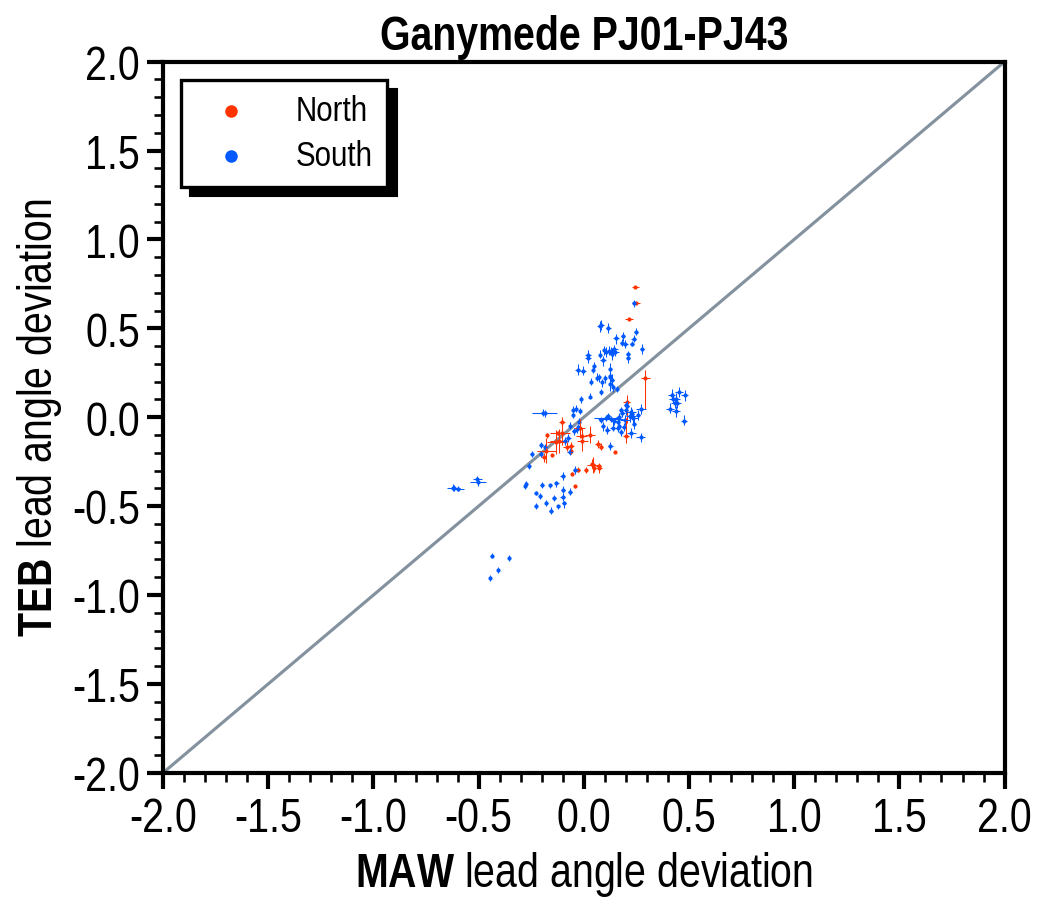

In [31]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(7,6), ticksize=1.5,
                dpi='M')
F.initialize()

F.set_xaxis(label='$\\bf{MAW}$ lead angle deviation',
            min=-2., max=2.,
            ticks=np.linspace(-2,2,9),
            ticklabels=np.linspace(-2,2,9),
            minor_num=5)
F.set_yaxis(ax_idx=0, label='$\\bf{TEB}$ lead angle deviation',
            min=-2., max=2.,
            ticks=np.linspace(-2,2,9),
            ticklabels=np.linspace(-2,2,9),
            minor_num=5)

north = np.where(np.array(hemisphere_arr)==b'North')
south = np.where(np.array(hemisphere_arr)==b'South')
x0 = np.radians(moon_s3long_arr)
if target=='Io':
    x = x0
    y_N = 4.26+2.64*np.cos(x)+0.50*np.sin(x)+0.20*np.cos(2*x)+0.126*np.sin(2*x)
    y_S = 4.14-1.89*np.cos(x)-0.70*np.sin(x)+0.22*np.cos(2*x)-0.12*np.sin(2*x)
if target=='Europa':
    x = x0
    y_N = 5.78+3.29*np.cos(0.99*x)+1.41*np.sin(0.99*x)
    y_S = 7.06-3.37*np.cos(x)+0.15*np.sin(x)
if target=='Ganymede':
    x = x0
    y_N = 12.45+6.16*np.cos(0.98*x)+3.64*np.sin(0.98*x)
    y_S = 12.97-5.39*np.cos(0.99*x)-4.50*np.sin(0.99*x)

F.ax.scatter((d_MAW_eq_arr[north]-y_N[north])/y_N[north], 
             (d_TEB_eq_arr[north]-y_S[north])/y_S[north], 
             color=UC.red, s=1, label='North')
F.ax.errorbar((d_MAW_eq_arr[north]-y_N[north])/y_N[north], 
              (d_TEB_eq_arr[north]-y_S[north])/y_S[north], 
              xerr=np.array([d_MAW_eq_arr_0[north], 
                             d_MAW_eq_arr_1[north]])/y_N[north],
              yerr=np.array([d_TEB_eq_arr_0[north], 
                             d_TEB_eq_arr_1[north]])/y_S[north],
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.red)

F.ax.scatter((d_MAW_eq_arr[south]-y_S[south])/y_S[south], 
             (d_TEB_eq_arr[south]-y_N[south])/y_N[south], 
             color=UC.blue, s=1, label='South')
F.ax.errorbar((d_MAW_eq_arr[south]-y_S[south])/y_S[south], 
              (d_TEB_eq_arr[south]-y_N[south])/y_N[south], 
              xerr=np.array([d_MAW_eq_arr_0[south], 
                             d_MAW_eq_arr_1[south]])/y_S[south],
              yerr=np.array([d_TEB_eq_arr_0[south], 
                             d_TEB_eq_arr_1[south]])/y_N[south],
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.blue)

F.ax.plot(np.array([-15,15]), np.array([-15,15]), color=UC.gray, zorder=0.9)

F.ax.set_title(fig_title, fontsize=F.fontsize, weight='bold')

legend = F.legend(ax_idx=0, loc='upper left', ncol=1, markerscale=5, 
                  fontsize_scale=0.75, textcolor=False)
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

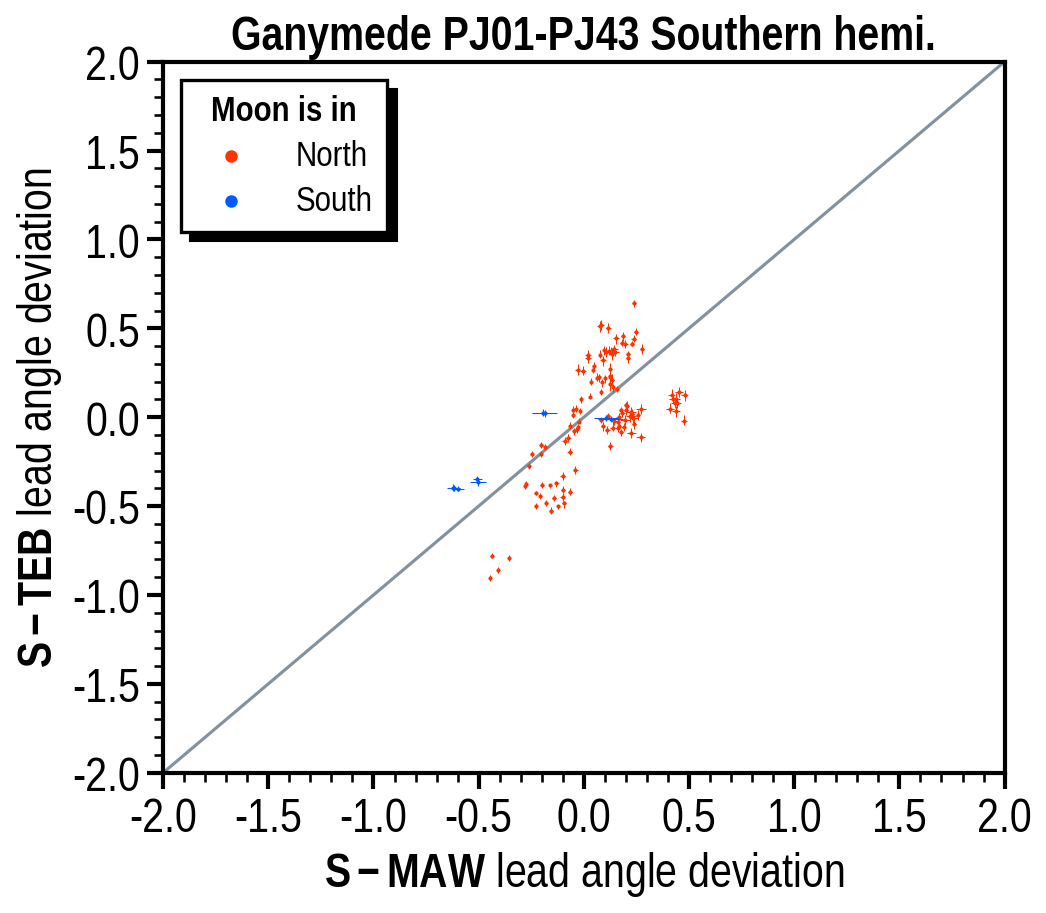

In [32]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(7,6), ticksize=1.5,
                dpi='M')
F.initialize()

F.set_xaxis(label='$\\bf{S-MAW}$ lead angle deviation',
            min=-2., max=2.,
            ticks=np.linspace(-2,2,9),
            ticklabels=np.linspace(-2,2,9),
            minor_num=5)
F.set_yaxis(ax_idx=0, label='$\\bf{S-TEB}$ lead angle deviation',
            min=-2., max=2.,
            ticks=np.linspace(-2,2,9),
            ticklabels=np.linspace(-2,2,9),
            minor_num=5)

north = np.where(np.array(hemisphere_arr)==b'North')
south = np.where(np.array(hemisphere_arr)==b'South')
Shemi_Smoon = np.where((np.array(hemisphere_arr)==b'South')&((moon_s3long_arr<114)|(moon_s3long_arr>294)))
Shemi_Nmoon = np.where((np.array(hemisphere_arr)==b'South')&((moon_s3long_arr>=114)&(moon_s3long_arr<=294)))
x0 = np.radians(moon_s3long_arr)
if target=='Io':
    x = x0
    y_N = 4.26+2.64*np.cos(x)+0.50*np.sin(x)+0.20*np.cos(2*x)+0.126*np.sin(2*x)
    y_S = 4.14-1.89*np.cos(x)-0.70*np.sin(x)+0.22*np.cos(2*x)-0.12*np.sin(2*x)
if target=='Europa':
    x = x0
    y_N = 5.78+3.29*np.cos(0.99*x)+1.41*np.sin(0.99*x)
    y_S = 7.06-3.37*np.cos(x)+0.15*np.sin(x)
if target=='Ganymede':
    x = x0
    y_N = 12.45+6.16*np.cos(0.98*x)+3.64*np.sin(0.98*x)
    y_S = 12.97-5.39*np.cos(0.99*x)-4.50*np.sin(0.99*x)

F.ax.scatter((d_MAW_eq_arr[Shemi_Nmoon]-y_S[Shemi_Nmoon])/y_S[Shemi_Nmoon], 
             (d_TEB_eq_arr[Shemi_Nmoon]-y_N[Shemi_Nmoon])/y_N[Shemi_Nmoon], 
             color=UC.red, s=1, label='North')
F.ax.errorbar((d_MAW_eq_arr[Shemi_Nmoon]-y_S[Shemi_Nmoon])/y_S[Shemi_Nmoon], 
              (d_TEB_eq_arr[Shemi_Nmoon]-y_N[Shemi_Nmoon])/y_N[Shemi_Nmoon], 
              xerr=np.array([d_MAW_eq_arr_0[Shemi_Nmoon], 
                             d_MAW_eq_arr_1[Shemi_Nmoon]])/y_S[Shemi_Nmoon],
              yerr=np.array([d_TEB_eq_arr_0[Shemi_Nmoon], 
                             d_TEB_eq_arr_1[Shemi_Nmoon]])/y_N[Shemi_Nmoon],
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.red)

F.ax.scatter((d_MAW_eq_arr[Shemi_Smoon]-y_S[Shemi_Smoon])/y_S[Shemi_Smoon], 
             (d_TEB_eq_arr[Shemi_Smoon]-y_N[Shemi_Smoon])/y_N[Shemi_Smoon], 
             color=UC.blue, s=1, label='South')
F.ax.errorbar((d_MAW_eq_arr[Shemi_Smoon]-y_S[Shemi_Smoon])/y_S[Shemi_Smoon], 
              (d_TEB_eq_arr[Shemi_Smoon]-y_N[Shemi_Smoon])/y_N[Shemi_Smoon], 
              xerr=np.array([d_MAW_eq_arr_0[Shemi_Smoon], 
                             d_MAW_eq_arr_1[Shemi_Smoon]])/y_S[Shemi_Smoon],
              yerr=np.array([d_TEB_eq_arr_0[Shemi_Smoon], 
                             d_TEB_eq_arr_1[Shemi_Smoon]])/y_N[Shemi_Smoon],
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.blue)

F.ax.plot(np.array([-15,15]), np.array([-15,15]), color=UC.gray, zorder=0.9)

F.ax.set_title(fig_title+' Southern hemi.', fontsize=F.fontsize, weight='bold')

legend = F.legend(ax_idx=0, loc='upper left', ncol=1, markerscale=5, 
                  fontsize_scale=0.75, textcolor=False,
                  title='Moon is in')
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

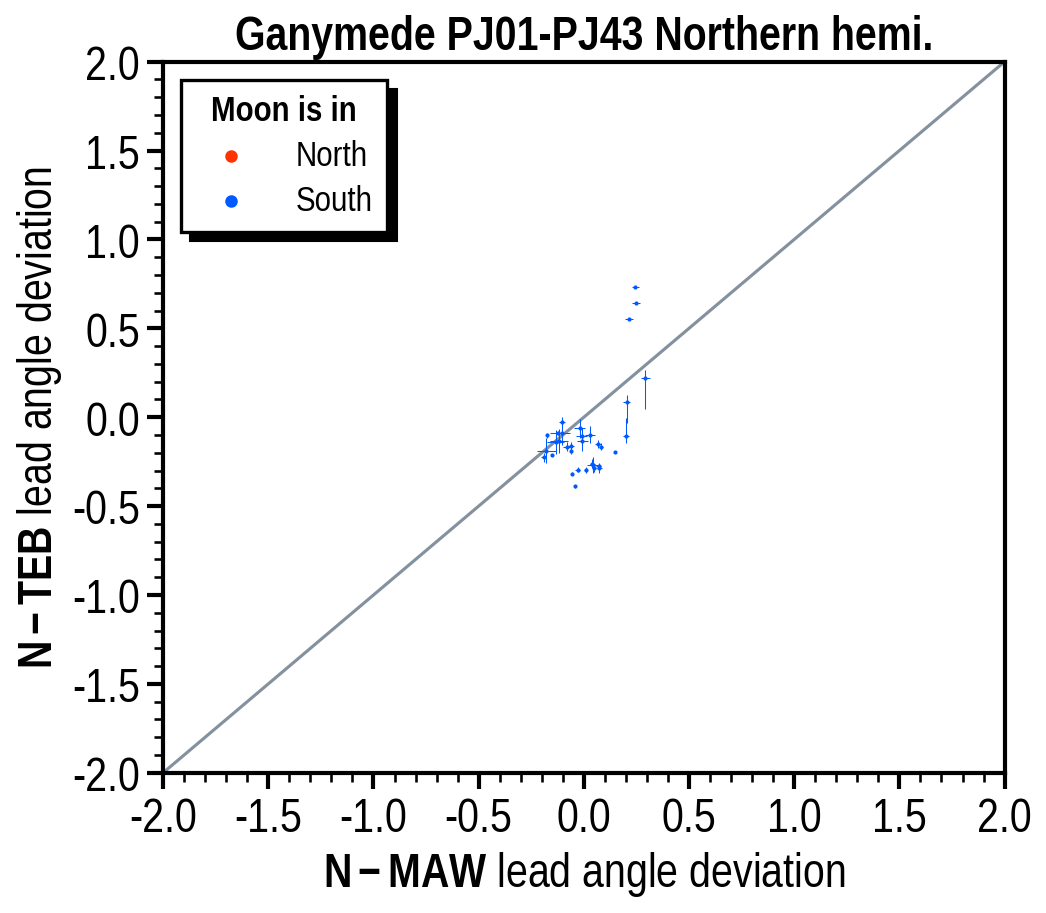

In [33]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(7,6), ticksize=1.5,
                dpi='M')
F.initialize()

F.set_xaxis(label='$\\bf{N-MAW}$ lead angle deviation',
            min=-2., max=2.,
            ticks=np.linspace(-2,2,9),
            ticklabels=np.linspace(-2,2,9),
            minor_num=5)
F.set_yaxis(ax_idx=0, label='$\\bf{N-TEB}$ lead angle deviation',
            min=-2., max=2.,
            ticks=np.linspace(-2,2,9),
            ticklabels=np.linspace(-2,2,9),
            minor_num=5)

north = np.where(np.array(hemisphere_arr)==b'North')
south = np.where(np.array(hemisphere_arr)==b'South')
Shemi_Smoon = np.where((np.array(hemisphere_arr)==b'South')&((moon_s3long_arr<114)|(moon_s3long_arr>294)))
Shemi_Nmoon = np.where((np.array(hemisphere_arr)==b'South')&((moon_s3long_arr>=114)&(moon_s3long_arr<=294)))
Nhemi_Smoon = np.where((np.array(hemisphere_arr)==b'North')&((moon_s3long_arr<114)|(moon_s3long_arr>294)))
Nhemi_Nmoon = np.where((np.array(hemisphere_arr)==b'North')&((moon_s3long_arr>=114)&(moon_s3long_arr<=294)))
x0 = np.radians(moon_s3long_arr)
if target=='Io':
    x = x0
    y_N = 4.26+2.64*np.cos(x)+0.50*np.sin(x)+0.20*np.cos(2*x)+0.126*np.sin(2*x)
    y_S = 4.14-1.89*np.cos(x)-0.70*np.sin(x)+0.22*np.cos(2*x)-0.12*np.sin(2*x)
if target=='Europa':
    x = x0
    y_N = 5.78+3.29*np.cos(0.99*x)+1.41*np.sin(0.99*x)
    y_S = 7.06-3.37*np.cos(x)+0.15*np.sin(x)
if target=='Ganymede':
    x = x0
    y_N = 12.45+6.16*np.cos(0.98*x)+3.64*np.sin(0.98*x)
    y_S = 12.97-5.39*np.cos(0.99*x)-4.50*np.sin(0.99*x)

F.ax.scatter((d_MAW_eq_arr[Nhemi_Nmoon]-y_N[Nhemi_Nmoon])/y_N[Nhemi_Nmoon], 
             (d_TEB_eq_arr[Nhemi_Nmoon]-y_S[Nhemi_Nmoon])/y_S[Nhemi_Nmoon], 
             color=UC.red, s=1, label='North')
F.ax.errorbar((d_MAW_eq_arr[Nhemi_Nmoon]-y_N[Nhemi_Nmoon])/y_N[Nhemi_Nmoon], 
              (d_TEB_eq_arr[Nhemi_Nmoon]-y_S[Nhemi_Nmoon])/y_S[Nhemi_Nmoon], 
              xerr=np.array([d_MAW_eq_arr_0[Nhemi_Nmoon], 
                             d_MAW_eq_arr_1[Nhemi_Nmoon]])/y_N[Nhemi_Nmoon],
              yerr=np.array([d_TEB_eq_arr_0[Nhemi_Nmoon], 
                             d_TEB_eq_arr_1[Nhemi_Nmoon]])/y_S[Nhemi_Nmoon],
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.red)

F.ax.scatter((d_MAW_eq_arr[Nhemi_Smoon]-y_N[Nhemi_Smoon])/y_N[Nhemi_Smoon], 
             (d_TEB_eq_arr[Nhemi_Smoon]-y_S[Nhemi_Smoon])/y_S[Nhemi_Smoon], 
             color=UC.blue, s=1, label='South')
F.ax.errorbar((d_MAW_eq_arr[Nhemi_Smoon]-y_N[Nhemi_Smoon])/y_N[Nhemi_Smoon], 
              (d_TEB_eq_arr[Nhemi_Smoon]-y_S[Nhemi_Smoon])/y_S[Nhemi_Smoon], 
              xerr=np.array([d_MAW_eq_arr_0[Nhemi_Smoon], 
                             d_MAW_eq_arr_1[Nhemi_Smoon]])/y_N[Nhemi_Smoon],
              yerr=np.array([d_TEB_eq_arr_0[Nhemi_Smoon], 
                             d_TEB_eq_arr_1[Nhemi_Smoon]])/y_S[Nhemi_Smoon],
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.blue)

F.ax.plot(np.array([-15,15]), np.array([-15,15]), color=UC.gray, zorder=0.9)

F.ax.set_title(fig_title+' Northern hemi.', fontsize=F.fontsize, weight='bold')

legend = F.legend(ax_idx=0, loc='upper left', ncol=1, markerscale=5, 
                  fontsize_scale=0.75, textcolor=False,
                  title='Moon is in')
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

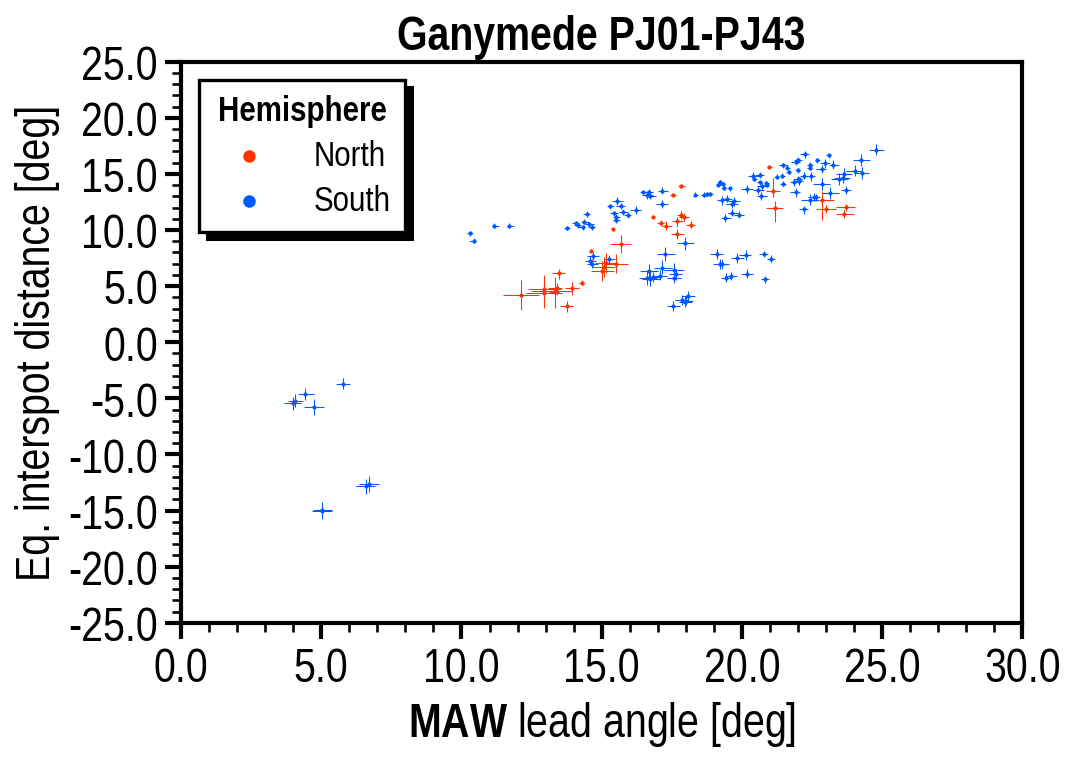

In [34]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(7,5), ticksize=1.5,
                dpi='M')
F.initialize()

ymin = 0
ymax = 1
if target == 'Io':
    xmin = 0.
    xmax = 10.
    ymin = -10.
    ymax = 10.
elif target == 'Europa':
    xmin = 0.
    xmax = 15.
    ymin = -15.
    ymax = 15.
elif target == 'Ganymede':
    xmin = 0.
    xmax = 30.
    ymin = -25.
    ymax = 25.

F.set_xaxis(label='$\\bf{MAW}$ lead angle [deg]',
            min=xmin, max=xmax,
            ticks=np.arange(0,xmax+1,5),
            ticklabels=np.arange(0,xmax+1,5),
            minor_num=5)
F.set_yaxis(ax_idx=0, label='Eq. interspot distance [deg]',
            min=ymin, max=ymax,
            ticks=np.arange(ymin,ymax+1,5),
            ticklabels=np.arange(ymin,ymax+1,5),
            minor_num=5)

north = np.where(np.array(hemisphere_arr)==b'North')
south = np.where(np.array(hemisphere_arr)==b'South')
x0 = np.radians(moon_s3long_arr)
if target=='Io':
    x = x0
    y_N = 4.26+2.64*np.cos(x)+0.50*np.sin(x)+0.20*np.cos(2*x)+0.126*np.sin(2*x)
    y_S = 4.14-1.89*np.cos(x)-0.70*np.sin(x)+0.22*np.cos(2*x)-0.12*np.sin(2*x)
if target=='Europa':
    x = x0
    y_N = 5.78+3.29*np.cos(0.99*x)+1.41*np.sin(0.99*x)
    y_S = 7.06-3.37*np.cos(x)+0.15*np.sin(x)
if target=='Ganymede':
    x = x0
    y_N = 12.45+6.16*np.cos(0.98*x)+3.64*np.sin(0.98*x)
    y_S = 12.97-5.39*np.cos(0.99*x)-4.50*np.sin(0.99*x)

pos = north
F.ax.scatter(d_MAW_eq_arr[pos], 
             (d_MAW_eq_arr[pos]-d_TEB_eq_arr[pos]), 
             color=UC.red, s=1, label='North')
F.ax.errorbar(d_MAW_eq_arr[pos], 
              (d_MAW_eq_arr[pos]-d_TEB_eq_arr[pos]), 
              xerr=np.array([d_MAW_eq_arr_0[pos], 
                             d_MAW_eq_arr_1[pos]]),
              yerr=np.array([(d_MAW_eq_arr_0[pos]+d_TEB_eq_arr_0[pos]), 
                             (d_MAW_eq_arr_1[pos]+d_TEB_eq_arr_1[pos])]),
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.red)

pos = south
F.ax.scatter(d_MAW_eq_arr[pos], 
             (d_MAW_eq_arr[pos]-d_TEB_eq_arr[pos]), 
             color=UC.blue, s=1, label='South')
F.ax.errorbar(d_MAW_eq_arr[pos], 
              (d_MAW_eq_arr[pos]-d_TEB_eq_arr[pos]), 
              xerr=np.array([d_MAW_eq_arr_0[pos], 
                             d_MAW_eq_arr_1[pos]]),
              yerr=np.array([(d_MAW_eq_arr_0[pos]+d_TEB_eq_arr_0[pos]), 
                             (d_MAW_eq_arr_1[pos]+d_TEB_eq_arr_1[pos])]),
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.blue)

F.ax.set_title(fig_title, fontsize=F.fontsize, weight='bold')

legend = F.legend(ax_idx=0, loc='upper left', ncol=1, markerscale=5, 
                  title='Hemisphere', fontsize_scale=0.75, textcolor=False)
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

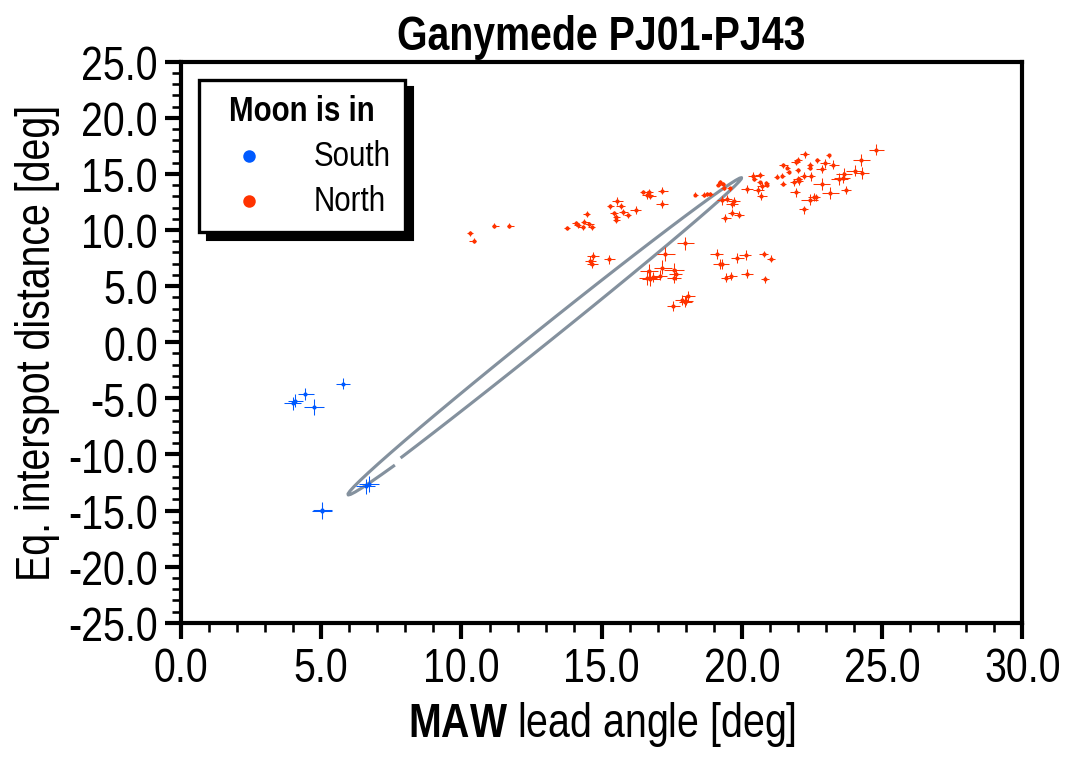

In [35]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(7,5), ticksize=1.5,
                dpi='M')
F.initialize()

ymin = 0
ymax = 1
if target == 'Io':
    xmin = 0.
    xmax = 10.
    ymin = -10.
    ymax = 10.
elif target == 'Europa':
    xmin = 0.
    xmax = 15.
    ymin = -15.
    ymax = 15.
elif target == 'Ganymede':
    xmin = 0.
    xmax = 30.
    ymin = -25.
    ymax = 25.

F.set_xaxis(label='$\\bf{MAW}$ lead angle [deg]',
            min=xmin, max=xmax,
            ticks=np.arange(0,xmax+1,5),
            ticklabels=np.arange(0,xmax+1,5),
            minor_num=5)
F.set_yaxis(ax_idx=0, label='Eq. interspot distance [deg]',
            min=ymin, max=ymax,
            ticks=np.arange(ymin,ymax+1,5),
            ticklabels=np.arange(ymin,ymax+1,5),
            minor_num=5)

north = np.where(np.array(hemisphere_arr)==b'North')
south = np.where(np.array(hemisphere_arr)==b'South')
Shemi_Smoon = np.where((np.array(hemisphere_arr)==b'South')&((moon_s3long_arr<114)|(moon_s3long_arr>294)))
Shemi_Nmoon = np.where((np.array(hemisphere_arr)==b'South')&((moon_s3long_arr>=114)&(moon_s3long_arr<=294)))
Nhemi_Smoon = np.where((np.array(hemisphere_arr)==b'North')&((moon_s3long_arr<114)|(moon_s3long_arr>294)))
Nhemi_Nmoon = np.where((np.array(hemisphere_arr)==b'North')&((moon_s3long_arr>=114)&(moon_s3long_arr<=294)))
x0 = np.radians(moon_s3long_arr)
if target=='Io':
    x = x0
    y_N = 4.26+2.64*np.cos(x)+0.50*np.sin(x)+0.20*np.cos(2*x)+0.126*np.sin(2*x)
    y_S = 4.14-1.89*np.cos(x)-0.70*np.sin(x)+0.22*np.cos(2*x)-0.12*np.sin(2*x)
if target=='Europa':
    x = x0
    y_N = 5.78+3.29*np.cos(0.99*x)+1.41*np.sin(0.99*x)
    y_S = 7.06-3.37*np.cos(x)+0.15*np.sin(x)
if target=='Ganymede':
    x = x0
    y_N = 12.45+6.16*np.cos(0.98*x)+3.64*np.sin(0.98*x)
    y_S = 12.97-5.39*np.cos(0.99*x)-4.50*np.sin(0.99*x)

pos = Shemi_Smoon
F.ax.scatter(d_MAW_eq_arr[pos], 
             (d_MAW_eq_arr[pos]-d_TEB_eq_arr[pos]), 
             color=UC.blue, s=1, label='South')
F.ax.errorbar(d_MAW_eq_arr[pos], 
              (d_MAW_eq_arr[pos]-d_TEB_eq_arr[pos]), 
              xerr=np.array([d_MAW_eq_arr_0[pos], 
                             d_MAW_eq_arr_1[pos]]),
              yerr=np.array([(d_MAW_eq_arr_0[pos]+d_TEB_eq_arr_0[pos]), 
                             (d_MAW_eq_arr_1[pos]+d_TEB_eq_arr_1[pos])]),
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.blue)

pos = Shemi_Nmoon
F.ax.scatter(d_MAW_eq_arr[pos], 
             (d_MAW_eq_arr[pos]-d_TEB_eq_arr[pos]), 
             color=UC.red, s=1, label='North')
F.ax.errorbar(d_MAW_eq_arr[pos], 
              (d_MAW_eq_arr[pos]-d_TEB_eq_arr[pos]), 
              xerr=np.array([d_MAW_eq_arr_0[pos], 
                             d_MAW_eq_arr_1[pos]]),
              yerr=np.array([(d_MAW_eq_arr_0[pos]+d_TEB_eq_arr_0[pos]), 
                             (d_MAW_eq_arr_1[pos]+d_TEB_eq_arr_1[pos])]),
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.red)


x0 = np.radians(np.linspace(0,360,60))
if target=='Io':
    x = x0
    y_N = 4.26+2.64*np.cos(x)+0.50*np.sin(x)+0.20*np.cos(2*x)+0.126*np.sin(2*x)
    y_S = 4.14-1.89*np.cos(x)-0.70*np.sin(x)+0.22*np.cos(2*x)-0.12*np.sin(2*x)
if target=='Europa':
    x = x0
    y_N = 5.78+3.29*np.cos(0.99*x)+1.41*np.sin(0.99*x)
    y_S = 7.06-3.37*np.cos(x)+0.15*np.sin(x)
if target=='Ganymede':
    x = x0
    y_N = 12.45+6.16*np.cos(0.98*x)+3.64*np.sin(0.98*x)
    y_S = 12.97-5.39*np.cos(0.99*x)-4.50*np.sin(0.99*x)
F.ax.plot(y_S, y_S-y_N,
          color=UC.gray, zorder=0.9)

F.ax.set_title(fig_title, fontsize=F.fontsize, weight='bold')

legend = F.legend(ax_idx=0, loc='upper left', ncol=1, markerscale=5, 
                  fontsize_scale=0.75, textcolor=False,
                  title='Moon is in')
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)